In [1]:
!pip install pandas
!pip install numpy
import os
import glob
import pandas as pd
import numpy as np

!pip install jieba
import jieba
import jieba.analyse
!pip install hanziconv
from hanziconv.hanziconv import HanziConv
import operator

import re
from collections import Counter
from collections import defaultdict
import pandas as pd
import numpy as np

import math


# file&cat
## all.txt

In [12]:
# 找到所有txt
#rootFolderList = [
    #'./data/bankContent/0g',
    #'./data/bankContent/1s',
    #'./data/bankContent/2r',
    #'./data/bankContent/3m',
    #'./data/bankContent/all',
#]

#rootFolderList = [
#    './data/insuranceContent/l/0g',
#    './data/insuranceContent/l/1s',
#    './data/insuranceContent/l/2r',
#    './data/insuranceContent/l/3m',
#    './data/insuranceContent/l/all'
#]

rootFolderList = [
    './data/insuranceContent/p/0g',
    './data/insuranceContent/p/1s',
    './data/insuranceContent/p/2r',
    './data/insuranceContent/p/3m',
    './data/insuranceContent/p/all',
    './data/insuranceContent/p/eng'
]
#categories = ['0g', '1s', '2r', '3m', '6f+l'] #, '4f', '5l'

txtcount = 0
data = ''
dataAndName = {}
for rootFolder in rootFolderList:
    for root, dirs, files in os.walk(rootFolder):
        #print(root, files)
        txtcountCat = 0
        for txt in files:
            # print(txt)
            if txt.endswith('.txt'):
                with open(os.path.join(root, txt), encoding="utf8") as file:
                    txtdata = file.read()
                    if txtdata == '':
                        continue
                    txtcount += 1
                    txtcountCat += 1                    
                    txtdatanew = re.sub(r'[\n\t\s.◆•]', '', txtdata)
                    data += txtdatanew
                    dataAndName[txt] = txtdatanew
                    #print(dataAndName)
        print(f"{root}讀入{txtcountCat}本txt")
        #print(dataAndName)
print(f"讀入{txtcount}本txt")

#將字典存入txt，TCFDid(key) : Content(value)
#with open('./data/bankContent/all_bank.txt', 'w', encoding='utf8') as f:
#with open('./data/insuranceContent/l/all_life.txt', 'w', encoding='utf8') as f:
with open('./data/insuranceContent/p/all_property.txt', 'w', encoding='utf8') as f:
#with open('./data/insuranceContent/p/property_all_without_english.txt', 'w', encoding='utf8') as f:
    for key, values in dataAndName.items():
        f.write(key + ' ' + values + '\n')

./data/insuranceContent/p/0g讀入11本txt
./data/insuranceContent/p/1s讀入11本txt
./data/insuranceContent/p/2r讀入11本txt
./data/insuranceContent/p/3m讀入11本txt
./data/insuranceContent/p/all讀入8本txt
./data/insuranceContent/p/eng讀入7本txt
讀入59本txt


In [36]:
#for key, values in dataAndName.items():
#    print(key + ' ' + values)
filenames = dataAndName.keys()
print(filenames)

dict_keys(['2022_l_chinalife_tcfd_m.txt', '2022_l_chinalife_tcfd_r.txt', '2022_l_allianz_tcfd_m.txt', '2022_l_allianz_tcfd_g.txt', '2022_l_chinalife_tcfd_g.txt', '2022_l_allianz_tcfd_s.txt', '2022_l_allianz_tcfd_r.txt', '2022_l_twfhclife_tcfd_r.txt', '2022_l_twfhclife_tcfd_g.txt', '2022_l_pcalife_tcfd_s.txt', '2022_l_pcalife_tcfd_r.txt', '2022_l_twfhclife_tcfd_m.txt', '2022_l_twfhclife_tcfd_s.txt', '2022_l_chubbp_tcfd_s.txt', '2022_l_chubbp_tcfd_m.txt', '2022_l_chubbp_tcfd_g.txt', '2022_l_chubbp_tcfd_r.txt', '2022_l_hontai_tcfd_s.txt', '2022_l_hontai_tcfd_r.txt', '2022_l_hontai_tcfd_m.txt', '2022_l_pcalife_tcfd_m.txt', '2022_l_hontai_tcfd_g.txt', '2022_l_pcalife_tcfd_g.txt', '2022_l_chinalife_tcfd_s.txt', '2022_l_CTBC Holding_tcfd_g.txt', '2022_l_CTBC Holding_tcfd_s.txt', '2022_l_CTBC Holding_tcfd_r.txt', '2022_l_CTBC Holding_tcfd_m.txt', '2022_l_Taishin Holdings_tcfd_g.txt', '2022_l_Taishin Holdings_tcfd_s.txt', '2022_l_Taishin Holdings_tcfd_r.txt', '2022_l_Taishin Holdings_tcfd_m.txt

In [37]:
# 初始化字典，存放每個保險類型的公司名稱
insurance_dict = defaultdict(set)

for filename in filenames:
    match = re.match(r'^\d{4}_(l|p)_(.*?)_(tcfd|esg)', filename)
    if match:
        year = match.group(0)
        insurance_type = match.group(1)  # 'l' or 'p'
        company_name = match.group(2)  # 公司名稱
        report_type = match.group(3)

        # 根據 'l' 或 'p' 將公司名稱放入對應的集合
        if insurance_type == 'l':
            insurance_dict['life'].add(company_name)
        elif insurance_type == 'p':
            insurance_dict['property'].add(company_name)

for insurance_type, companies in insurance_dict.items():
    company_list = ', '.join(companies)
    print(f"{insurance_type.capitalize()} : {len(companies)}, {company_list}")


Life : 21, twfhclife, AIA, yuantaHolding, global, fubon, CTBC Holding, BNPtcb, farglory, post, mercuries, cathay, shinkong, Firstfinancial, chinalife, Taishin Holdings, allianz, chubbp, hontai, BNP, nanshan, pcalife


In [31]:
#from collections import defaultdict
#file_names = [
#    '2022_l_chinalife_tcfd_m.txt', 
#    '2022_l_chinalife_tcfd_r.txt', 
#    '2022_l_linebank_esg_r.txt',
#    '2022_p_hotai_esg_all.txt', 
#    '2022_p_south-china_esg_all.txt'
#]

#insdict = defaultdict(set)

#for file_name in file_names:
#    match = re.match(r'^\d{4}_(l|p)_(.*?)_(tcfd|esg)', file_name)
#    if match:
#        year = match.group(0)
#        insurance_type = match.group(1)  # 'l' or 'p'
#        company_name = match.group(2)  # 公司名稱
#        report_type = match.group(3)
#        if insurance_type == 'l':
#            insdict['life'].add(company_name)
#            insdict['life_report'].add(report_type)
#        elif insurance_type == 'p':
#            insdict['property'].add(company_name)
#            insdict['property_report'].add(report_type)
#print(insdict)
#for insurance_type, life_report, companies in insdict.items():
#    print(insdict)
#    company_list = ', '.join(companies)
#    print(f"{insurance_type.capitalize()} : {len(companies)}, {company_list}")

        

defaultdict(<class 'set'>, {'life': {'linebank', 'chinalife'}, 'life_report': {'tcfd', 'esg'}, 'property': {'hotai', 'south-china'}, 'property_report': {'esg'}})


# cat basic stats

In [2]:
import random

class Unigrameda:
    def __init__(self):
        self.unigramcounter = Counter()
        self.uniwordList = []

    def unigramCount(self, cleaneddata):
        self.uniwordList = list(cleaneddata)
        self.unigramcounter = Counter(cleaneddata)
        return sum(self.unigramcounter.values())

    def differentUnigram(self):
        return len(self.unigramcounter.keys())
    
    def standardized_ttr(self, sample_size=None, simulations=None):
        #print(len(self.uniwordList))#, self.uniwordList)
        ttr_samples = []
        for i in range(simulations):
            sample = random.choices(self.uniwordList, k=sample_size)
            sample_types = len(set(sample))
            ttr_samples.append(sample_types)
        average_ttr = sum(ttr_samples) / len(ttr_samples) if ttr_samples else 0
        return f"{average_ttr:.0f}"
    
    def standardized_entropy(self, sample_size=None, simulations=None):
        '''隨機抽sample size計算entropy'''
        entropy_samples = []        
        for i in range(simulations):
            sample = random.choices(self.uniwordList, k=sample_size) #標準化，隨機取sample_size個詞計算entropy, simpson, ttr
            sample_unigramcounter = Counter(sample)
            totalunigram = sum(sample_unigramcounter.values())
            unigramprob = {unigram: count / totalunigram for unigram, count in sample_unigramcounter.items()}
            entropy = -sum(p * math.log(p) for p in unigramprob.values())
            entropy_samples.append(entropy)
        avgentropy = sum(entropy_samples) / len(entropy_samples)
        return avgentropy

    def standardized_simpson(self, sample_size=None, simulations=None):
        '''隨機抽sample size計算simpson'''
        simpson_samples = []       
        for i in range(simulations):
            sample = random.choices(self.uniwordList, k=sample_size) #標準化，隨機取sample_size個詞計算entropy, simpson, ttr
            sample_unigramcounter = Counter(sample)
            totalunigram = sum(sample_unigramcounter.values())
            unigramprob = {unigram: count / totalunigram for unigram, count in sample_unigramcounter.items()}
            simpson = sum(p**2 for p in unigramprob.values())
            simpson_samples.append(simpson)
        avgsimpson = sum(simpson_samples) / len(simpson_samples)
        return avgsimpson          



class Bigrameda:
    def __init__(self):
        self.bigramcounter = Counter()
        self.wordList = []

    def bigramCount(self, cleaneddata):
        jieba.load_userdict('mydictionary.txt')
        word = jieba.cut(cleaneddata, cut_all=False)
        self.wordList = [w for w in word if len(w) >= 2]
        self.bigramcounter = Counter(self.wordList)
        return sum(self.bigramcounter.values())
    
    def differentBigram(self):
        return len(self.bigramcounter.keys())
    
    def standardized_ttr(self, sample_size=None, simulations=None):
        '''隨機抽sample size有幾種詞'''
        ttr_samples = []
        for i in range(simulations):
            sample = random.choices(self.wordList, k=sample_size)
            sample_types = len(set(sample))
            ttr = sample_types
            ttr_samples.append(ttr)
        average_ttr = sum(ttr_samples) / len(ttr_samples)
        return f"{average_ttr:.0f}"

    def standardized_entropy(self, sample_size=None, simulations=None):
        '''隨機抽sample size計算entropy'''
        entropy_samples = []        
        for i in range(simulations):
            sample = random.choices(self.wordList, k=sample_size) #標準化，隨機取sample_size個詞計算entropy, simpson, ttr
            sample_bigramcounter = Counter(sample)
            totalbigram = sum(sample_bigramcounter.values())
            bigramprob = {bigram: count / totalbigram for bigram, count in sample_bigramcounter.items()}
            entropy = -sum(p * math.log(p) for p in bigramprob.values())
            entropy_samples.append(entropy)
        avgentropy = sum(entropy_samples) / len(entropy_samples)
        return avgentropy

    def standardized_simpson(self, sample_size=None, simulations=None):
        '''隨機抽sample size計算simpson'''
        simpson_samples = []        
        for i in range(simulations):
            sample = random.choices(self.wordList, k=sample_size) #標準化，隨機取sample_size個詞計算entropy, simpson, ttr
            sample_bigramcounter = Counter(sample)
            totalbigram = sum(sample_bigramcounter.values())
            bigramprob = {bigram: count / totalbigram for bigram, count in sample_bigramcounter.items()}
            simpson = sum(p**2 for p in bigramprob.values())
            simpson_samples.append(simpson)
        avgsimpson = sum(simpson_samples) / len(simpson_samples)
        return avgsimpson        

def extract_category(filename):
    return filename.split('_')[-1] #.split('.')[0]


In [3]:
df = pd.read_excel('./data/107-109年商業及管理學門碩博士論文.xlsx')
subjects = df['SubjectClass'].dropna().unique().tolist()
print(len(subjects))

10


In [4]:
subjects_data = {subject: '' for subject in subjects}
subject_counts = Counter()  # 為相應類別增加計數

results = []
for subject in subjects:
    subject_counts[subject] += 1
    abstracts = df[df['SubjectClass'] == subject]['AbstractCName'].dropna().tolist()
    text = ''.join(abstract for abstract in abstracts)
    text_cleaned = ''.join(re.findall(r'[\u4e00-\u9fa5]', text))
    print(text_cleaned[:100])
    subjects_data[subject] += text_cleaned
    

    uni = Unigrameda()
    total_count_uni = uni.unigramCount(subjects_data[subject])
    different_unigrams_uni = uni.differentUnigram()
    ttr_500_uni = uni.standardized_ttr(sample_size=10000, simulations=100)
    entropy_500_uni = uni.standardized_entropy(sample_size=10000, simulations=100)
    simpson_500_uni = uni.standardized_simpson(sample_size=10000, simulations=100)

    bi = Bigrameda()
    total_count_bi = bi.bigramCount(subjects_data[subject])
    different_unigrams_bi = bi.differentBigram()
    ttr_500_bi = bi.standardized_ttr(sample_size=10000, simulations=100)
    entropy_500_bi = bi.standardized_entropy(sample_size=10000, simulations=100)
    simpson_500_bi = bi.standardized_simpson(sample_size=10000, simulations=100)

    results.append([subject, total_count_uni, different_unigrams_uni, ttr_500_uni, entropy_500_uni, simpson_500_uni,
                             total_count_bi, different_unigrams_bi, ttr_500_bi, entropy_500_bi, simpson_500_bi])
    
columns = ['Subject', 'Total Count Unigram', 'Different Unigrams', 'TTR Unigram500', 'Entropy Unigram500', 'Simpson Unigram500',
        'Total Count Bigram', 'Different Bigrams', 'TTR Bigram500', 'Entropy Bigram500', 'Simpson Bigram500']
result_df = pd.DataFrame(results, columns=columns)

result_df

隨著競爭環境日益激烈企業需面臨越來越多經營策略上矛盾兩難的問題領導者與追隨者也就必須面對這種矛盾的工作要求以提升組織競爭力與永續發展然而過去的研究多侷限在矛盾領導者或矛盾追隨者單一方面領域的相關議題研


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.433 seconds.
Prefix dict has been built successfully.


在台灣女性內衣產業市場每年的營業額約在二百五十億元消費人口約萬人但依據中華徵信所的資料顯示台灣內衣業持續五年來衰退不僅百貨櫃位萎縮一半近年來專櫃業績衰退逾這些流失的業績則分散於網購與快時尚由於女性內衣
近十餘年來由於國民教育及經濟生活水準提高再加上政府密切的監督與管理保險已是人們做為家庭或企業員工理財規劃的必要工具之一保險亦漸漸為國人所接受有鑑於此教育政策主管機關與財政部保險司協商推動保險教育融入未
本文欲探討美國黃金選擇權資訊內涵對於臺灣黃金期貨市場波動性之影響所使用的美國黃金選擇權資訊內涵來自芝加哥選擇權交易所計算出的黃金波動率指數並同時考量其他控制變數如臺灣黃金期貨市場之交易量未平倉量與投資
台灣自年金融海嘯後投資人投資趨於保守紛紛把持股抛售退出資本市場行政院為穩定國內的投資環境遂於年修正公司法修正後得以資本公積配發股利再者資本市場全球化已是時代的趨勢鑒於國內許多大型之上市櫃公司已前往國外
隨著網路社群的發展使得具有相同興趣或是問題的人們能夠形成社群便利的進行討論交流也因此在各種網路社群中產生了大量的內容其中包含各種知識散佈於社群之中社群問答網站是一種設計用來進行問答行為的社群平台藉由使
隨著電子商務平台快速發展越來越多零售業的銷售模式逐漸轉往線上平台因此顧客消費習慣也從線下轉移線上不僅帶給消費者在購物上有更多的體驗及便利產品包裝樣式也產生相大的變化然而這些龐大商機的背後卻消耗大量的一
摘要品牌忠誠度建立了客戶與公司之間的長期關係本研究的目的是瞭解影響客戶品牌忠誠度的因素之間的關係以品牌為例此外本文著重於品牌忠誠度與不同世代的比較包括世代和世代研究使用份樣本的問卷進行調查並探討影響世
因應世界全球化及資訊發展快速的腳步企業在經營各方面都面臨種種考驗在戰戰兢兢的經濟環境下企業為了增加公司的競爭力追求公司經營績效能最大化將會處心積慮做合法的避稅規劃又經濟合作暨發展組織年發布共同申報準則
本文在混合雙佔的廠商競爭模型下區分存在公營廠商的國家與民營廠商的國家探討貿易成本與國際商品課稅原則的選擇本文發現首先存在公營廠商的國家在公營廠商重視消費者剩餘的程度較低時當貿易成本較低時會選擇生產地原


,Subject,Total Count Unigram,Different Unigrams,TTR Unigram500,Entropy Unigram500,Simpson Unigram500,Total Count Bigram,Different Bigrams,TTR Bigram500,Entropy Bigram500,Simpson Bigram500
0,其他商業及管理學類,3222000,3866,1154,6.237892,0.003810,1261609,99151,4042,7.525575,0.001685
1,企業管理學類,5699463,4297,1129,6.208767,0.003881,2232915,134734,3865,7.425510,0.001987
2,風險管理學類,207311,1957,1022,6.121978,0.004128,81311,13273,3408,7.286947,0.002233
3,財務金融學類,1614388,2901,1017,6.094215,0.004034,628644,51905,3589,7.275133,0.002279
4,會計學類,742704,2340,960,6.037197,0.004180,291823,27705,3276,7.134348,0.002886
5,醫管學類,539700,2441,1090,6.195769,0.003647,211823,24261,3561,7.318257,0.002164
6,行銷與流通學類,602227,2629,1107,6.188392,0.003921,235756,28500,3667,7.347873,0.002156
7,貿易學類,233832,2177,1059,6.166572,0.003980,91422,14237,3452,7.320864,0.002048
8,一般商業學類,266062,2282,1108,6.224419,0.003904,103697,17315,3753,7.483333,0.001584
9,財政學類,125464,1748,994,6.119860,0.003825,49198,9346,3268,7.286911,0.001949


## cat_to_content_cleaned.txt

In [ ]:
if __name__ == '__main__':
    ## 取得6類別*10特徵的結果，存成tenFeatures.xlsx
    #file_path = './data/bankContent/all_bank.txt'
    file_path = './data/insuranceContent/l/all_life.txt'
    #file_path = './data/insuranceContent/p/all_property_del_eng.txt'
    categories = ['g', 's', 'r', 'm', 'all']
    category_data = {cat: '' for cat in categories}
    category_counts = Counter()  # 為相應類別增加計數

    dataAll = ''
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            filename, txtdata = line.split('.txt ')[0], line.split('.txt ')[1] #資料剖析.split('.txt ')
            cat = extract_category(filename)
            print(filename, cat) 
            if cat in categories:
                pattern = re.compile(r'[\u4e00-\u9fa5]') #只取中文
                cleaned_data = pattern.findall(txtdata)
                category_data[cat] += ''.join(cleaned_data)
                category_counts[cat] += 1
    print(category_counts)
    print(category_data.keys())
    #with open('./data/bankContent/cat_to_content_cleaned_bank.txt', 'w', encoding='utf8') as f:
    with open('./data/insuranceContent/l/cat_to_content_cleaned_life.txt', 'w', encoding='utf8') as f:
    #with open('./data/insuranceContent/p/cat_to_content_cleaned_property.txt', 'w', encoding='utf8') as f:
        for key, values in category_data.items():
            f.write(key + ' ' + values + '\n')


2022_b_Mega International Commercial Bank_tcfd_g g
2022_b_Hwatai Bank_tcfd_g g
2022_b_Next Bank_tcfd_g g
2022_b_Huanan_tcfd_g g
2022_b_Line Bank_tcfd_g g
2022_b_KGI Bank_tcfd_g g
2022_b_HSBC_tcfd_g g
2022_b_Sunny Bank_tcfd_g g
2022_b_Taishin Holdings_tcfd_g g
2022_b_standard chartered_tcfd_g g
2022_b_SiniPac Holding_tcfd_g g
2022_b_TaipeiStarBank_tcfd_g g
2022_b_SKB_tcfd_g g
2022_b_The export-import bank of the republic of China_tcfd_g g
2022_b_Taiwanbusinessbank_tcfd_g g
2022_b_TaiwanCooperative Holding_tcfd_g g
2022_b_Yuanta Bank_tcfd_g g
2022_b_RICB_tcfd_g g
2022_b_E.SUN FHC_tcfd_g g
2022_b_EnTie Bank_tcfd_g g
2022_b_Firstfinancial_tcfd_g g
2022_b_CTBC Holding_tcfd_g g
2022_b_DBS_tcfd_g g
2022_b_Bank of Panhsin_tcfd_g g
2022_b_bok_tcfd_g g
2022_b_Fubon_tcfd_g g
2022_b_citi_tcfd_g g
2022_b_Cathayholding_tcfd_g g
2022_b_BOT_tcfd_g g
2022_b_SCSB_esg_g g
2022_b_CHB_tcfd_g g
2022_b_Sunny Bank_tcfd_s s
2022_b_SKB_tcfd_s s
2022_b_standard chartered_tcfd_s s
2022_b_SiniPac Holding_tcfd_s s


In [7]:
if __name__ == '__main__':
    #file_path = './data/bankContent/cat_to_content_cleaned_bank.txt'
    #file_path = './data/insuranceContent/l/cat_to_content_cleaned_life.txt'
    file_path = './data/insuranceContent/p/cat_to_content_cleaned_property.txt'

    categories = ['g', 's', 'r', 'm', 'all']
    category_data = {cat: '' for cat in categories}
    category_counts = Counter()  # 為相應類別增加計數

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            cat, text = line.strip().split(' ', 1)
            print(cat)
            print(text)  
            if cat in categories:
                category_data[cat] += ''.join(text)
            else:
                category_data[cat] = text

    print(category_data.keys())
    #print(category_data['all'][:100])

    results = []
    for cat in categories:
        uni = Unigrameda()
        total_count_uni = uni.unigramCount(category_data[cat])
        different_unigrams_uni = uni.differentUnigram()
        ttr_500_uni = uni.standardized_ttr(sample_size=10000, simulations=100)
        entropy_500_uni = uni.standardized_entropy(sample_size=10000, simulations=100)
        simpson_500_uni = uni.standardized_simpson(sample_size=10000, simulations=100)

        bi = Bigrameda()
        total_count_bi = bi.bigramCount(category_data[cat])
        different_unigrams_bi = bi.differentBigram()
        ttr_500_bi = bi.standardized_ttr(sample_size=10000, simulations=100)
        entropy_500_bi = bi.standardized_entropy(sample_size=10000, simulations=100)
        simpson_500_bi = bi.standardized_simpson(sample_size=10000, simulations=100)

        results.append([cat, total_count_uni, different_unigrams_uni, ttr_500_uni, entropy_500_uni, simpson_500_uni,
                             total_count_bi, different_unigrams_bi, ttr_500_bi, entropy_500_bi, simpson_500_bi])

    df = pd.DataFrame(results, columns=['Category', 'Total Count Unigram', 'Different Unigrams', 'TTR Unigram500', 'Entropy Unigram500', 'Simpson Unigram500',
                                                    'Total Count Bigram', 'Different Bigrams', 'TTR Bigram500', 'Entropy Bigram500', 'Simpson Bigram500'])

g
治理氣候治理架構隨著全球氣候變遷意識上升和泰產險意識到企業正面臨著前所未有的風險與挑戰為確保企業能夠永續且穩定發展和泰產險建立有效的氣候治理架構透過董事會企業永續委員會風險管理委員會權責單位及各業務單位由上而下推動針對氣候變遷風險制定相應的管理措施以減緩和調適氣候變遷帶來的影響並確保企業能夠在變化的環境中保持穩定和發展董事會和泰產險董事會為氣候相關議題的最高治理單位負責核定風險胃納對氣候相關風險與機會之管理負有最終責任企業永續委員會董事會轄下設立企業永續委員會由董事長擔任主任委員總經理為總幹事風險管理部為事務局組成小組包括綠色商品小組永續營運小組責任投資小組社會責任小組永續治理小組及小組委員會負責監督及指導氣候相關風險與機會之管理情形每年至少召開二次會議得視需要隨時召開會議並定期向董事會報告執行成果風險管理委員會董事會轄下設立風險管理委員會由兩名董事與風控長共同組成獨立董事擔任召集人負責監督及指導本公司氣候相關風險管理執行情形委員會原則上每季召開會議並定期向董事會報告並適時反應風險管理執行情形提出必要之改善建議風險管理部風險管理部規劃氣候相關風險管理機制確保相關業務單位已適當管理氣候相關風險逐步發展氣候相關風險情境分析與壓力測試彙整氣候相關風險管理推動情形並定期向風險管理委員會報告業務單位各業務單位其業務內容涉及氣候變遷相關者應依公司相關政策及管理規範執行充分瞭解所負責業務之氣候相關風險與機會鑑別其對財務業務商品及投資等之財務影響並落實執行氣候變遷相關管理程序強化氣候風險知識為強化和泰產險氣候韌性管理和泰產險委請外部顧問為公司董監事及管理階層進行氣候相關教育訓練年度本公司全體董事及高階主管皆參與氣候變遷發展趨勢與簡介教育訓練訓練時數小時未來仍持續規劃氣候變遷相關風險與機會的教育訓練提升董事及員工對於氣候變遷風險的認識氣候治理隨著極端天氣與氣候變遷日漸嚴峻各國政府及企業應更積極思考如何共同抑制全球升溫議題年各國領導人於埃及夏姆錫克舉行聯合國氣候變化綱要公約第次締約方會議中首次通過今年正式列入議程的損失與損害氣候賠償議案之基金設立同意由富國提供資金以補償受氣候變遷影響的弱勢國家對金融業而言完善的氣候治理制度不僅有助於公司管理氣候風險與掌握機會亦可回應全球對於氣候變遷議題的共識及各方利害關係人之期待本公司體認到氣候變遷的重要性採用氣候相關財務揭露建議架構以建立氣候變遷

In [8]:
df

,Category,Total Count Unigram,Different Unigrams,TTR Unigram500,Entropy Unigram500,Simpson Unigram500,Total Count Bigram,Different Bigrams,TTR Bigram500,Entropy Bigram500,Simpson Bigram500
0,g,6506,583,546,5.402859,0.008957,2637,800,788,5.538917,0.013687
1,s,22260,967,769,5.773090,0.006170,8983,2142,1692,6.266053,0.008222
2,r,19675,925,744,5.695362,0.007691,7911,1970,1617,6.156699,0.011661
3,m,8615,731,665,5.724773,0.005439,3310,1156,1120,6.262874,0.004144
4,all,14250,857,721,5.733890,0.006085,5788,1554,1380,6.112342,0.008296


In [46]:
#df.to_excel('./cat_stats_bank_5000.xlsx', index=False)
#df.to_excel('./cat_stats_life_5000.xlsx', index=False)
df.to_excel('./cat_stats_property_5000.xlsx', index=False)

# cat basic stats - Punctuation

In [35]:
class Punctuation():
    def __init__(self):
        self.punccounter = Counter()

    def halftofull(self, data):
        dictionary = {
            ',': '，',
            '?': '？',
            '!': '！',
            ';': '；',
            ':': '：',
            ':': '：',
            '(': '（',
            ')': '）',
            '{': '｛',
            '}': '｝',
            '╱': '／',
            '…': '…'
            # '℃': '',
            # '➡': '',
        }
        newtext = ''
        for w in data:
            if w in dictionary.keys():
                w = dictionary[w]
                newtext += w
            else:
                newtext += w
        return newtext

    def puncount(self, data):
        pattern = re.compile(r'[，、。；：？！—— —（）〔〕《》〈〉「」…『』—]')
        punctuation = pattern.findall(self.halftofull(str(data)))
        self.punccounter = Counter(punctuation)
        print(self.punccounter)
        puncount = sum(self.punccounter.values())
        puntype = len(self.punccounter)
        return puncount, puntype
        #df = pd.DataFrame(sorted(self.punccounts.items(), key=lambda x: x[1], reverse=True), columns=['Punctuation', 'Counts'])
        #df.to_excel(f'{name}標點符號len.xlsx', index=False)

    def sentencelength(self, data):
        pattern = re.compile(r'([^。，；！？]+)[。，；！？]')  # 斷句
        sentence = re.findall(pattern, data)
        length = 0
        sentencecounts = 0
        for sent in sentence:
            #print(sent)
            length += len(sent)
            sentencecounts += 1
        avglength = length/sentencecounts
        return sentencecounts, avglength
        #print(f'總共有{sentencecounts}句，平均句長{avglength:.1f}個字。')

def extract_category(filename):
    return filename.split('_')[-1] #資料剖析.split('_') ['2022', 'b', 'Next Bank', 'tcfd', 'g']

## cat_to_content_uncleaned.txt

In [47]:
if __name__ == '__main__':
    ## 取得6類別*10特徵的結果，存成tenFeatures.xlsx
    #file_path = './data/bankContent/all_bank.txt'
    #file_path = './data/insuranceContent/l/all_life.txt'
    file_path = './data/insuranceContent/p/all_property_del_eng.txt'    
    categories = ['g', 's', 'r', 'm', 'all']
    category_data_uncleaned = {cat: '' for cat in categories}
    category_counts = Counter()  # 為相應類別增加計數

    dataAll = ''
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            filename, txtdata = line.split('.txt ')[0], line.split('.txt ')[1] #資料剖析.split('.txt ')
            cat = extract_category(filename) 
            if cat in categories:
                category_data_uncleaned[cat] += ''.join(txtdata)
                category_counts[cat] += 1
    print(category_counts)
    print(category_data_uncleaned.keys())
    #with open('./data/bankContent/cat_to_content_uncleaned_bank.txt', 'w', encoding='utf8') as f:
    #with open('./data/insuranceContent/l/cat_to_content_uncleaned_life.txt', 'w', encoding='utf8') as f:
    #with open('./data/insuranceContent/p/cat_to_content_uncleaned_property.txt', 'w', encoding='utf8') as f:
        #for key, values in category_data_uncleaned.items():
        #    f.write(key + ' ' + values + '\n')

    results = []
    for cat in categories:
        print(cat)
        pun = Punctuation()
        total_count_pun, different_pun = pun.puncount(category_data_uncleaned[cat])
        sentencecounts, sentencelength = pun.sentencelength(category_data_uncleaned[cat])
        results.append([cat, total_count_pun, different_pun, sentencecounts, sentencelength])

Counter({'g': 11, 's': 11, 'r': 11, 'm': 11, 'all': 8})
dict_keys(['g', 's', 'r', 'm', 'all'])
g
Counter({'，': 220, '。': 100, '、': 66, '」': 40, '「': 36, '（': 36, '）': 36, '：': 5, '；': 5, '《': 3, '》': 3, '…': 1, '！': 1})
s
Counter({'，': 756, '。': 312, '、': 271, '：': 119, '（': 106, '）': 104, '」': 84, '「': 80, '；': 41, '《': 14, '》': 14, '！': 2, '『': 1, '』': 1, '…': 1})
r
Counter({'，': 639, '。': 295, '、': 206, '（': 81, '）': 81, '」': 59, '「': 58, '；': 56, '：': 52, '《': 9, '》': 9, '！': 2})
m
Counter({'，': 351, '。': 121, '、': 102, '（': 97, '）': 96, '「': 28, '」': 28, '：': 18, '；': 11, '《': 1, '》': 1})
all
Counter({'，': 536, '、': 181, '。': 180, '（': 94, '）': 94, '：': 46, '「': 37, '」': 37, '；': 27, '？': 1, '《': 1, '》': 1})


In [48]:
df_punc = pd.DataFrame(results, columns=['要素', '標點個數', '標點種類', '句數', '句長'])
df_punc

,要素,標點個數,標點種類,句數,句長
0,g,552,13,284,26.274648
1,s,1906,15,977,25.910952
2,r,1547,12,892,24.761211
3,m,854,11,395,27.531646
4,all,1235,12,723,22.958506


In [73]:
df_punc.to_excel('./cat_stats_punc_property.xlsx', index=False)

# file basic stats
## file_to_content_cleaned.txt (中文)

In [ ]:
import os
import re
parser= Parser()

rootFolderList = [
    './data/insuranceContent/l/0g',
    './data/insuranceContent/l/1s',
    './data/insuranceContent/l/2r',
    './data/insuranceContent/l/3m',
    './data/insuranceContent/l/all',
    './data/insuranceContent/p/0g',
    './data/insuranceContent/p/1s',
    './data/insuranceContent/p/2r',
    './data/insuranceContent/p/3m',
    './data/insuranceContent/p/all',
]

txtcount = 0

file_data = {}
for rootFolder in rootFolderList:
    for root, dirs, files in os.walk(rootFolder):
        txtcountCat = 0
        for txt in files:
            if txt.endswith('.txt'):
                baseName = re.sub(r'(_(tcfd|esg))_.*\.txt$', r'\1', txt)#保留tcfd 或 esg 以前的部分
                print(baseName)
                filePath = os.path.join(root, txt)
                with open(filePath, encoding="utf8") as file:
                    txtdata = file.read()
                    if txtdata == '':
                        continue
                    txtcountCat += 1
                    txtcount += 1        
                    pattern = re.compile(r'[\u4e00-\u9fa5]') #只取中文
                    txtdatar = pattern.findall(txtdata)
                    if baseName in file_data:
                        file_data[baseName] += ''.join(txtdatar)  # 合併內容
                    else:
                        file_data[baseName] = ''.join(txtdatar)
    print(f"{root}讀入{txtcountCat}本txt")
print(f"讀入{txtcount}本txt")

# 將字典存入txt，文件名(不含類別標記) : 合併後內容
with open('./data/insuranceContent/file_to_content_cleaned_ins.txt', 'w', encoding='utf8') as f:
    for key, values in file_data.items():
        f.write(key + ' ' + values + '\n')

print(file_data)


2022_p_cofase_esg
2022_p_allianzgroup_esg
2022_p_genre_esg
2022_p_RGA_esg
2022_p_RGA_esg
2022_p_RGA_esg
2022_p_RGA_esg
./data/insuranceContent/p/eng讀入7本txt
讀入7本txt
{'2022_p_cofase_esg': '6.2.2\nIntegration of CSR into the commercial policy\na)\nCommercial exclusion policy\nsensitive countries and sensitive equipment:\n●\nIn commercial terms, Coface is duty bound to demonstrate\nirreproachable ethical standards, in particular through its\ncommercial exclusion policy. The latter reflects the Group’s\ndetermination to avoid non‑ethical and/or non‑responsible\nbusiness activities, contribute to the Paris Agreement by\nwithdrawing from thermal coal, and manage reputational\nrisk.\nThis policy has been strengthened over the past three years.\nFor example, in thermal coal, a sector with a substantial\ncontribution to climate change, Coface has made several\ncommitments as part both of its credit insurance business\nand its single‑risk and bonding activities:\nSingle Risk and bonding\n●\nCofac

## file_to_content_cleaned_eng.txt (英文)

In [17]:
# Install necessary libraries if not already installed
!pip install nltk

import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  # Required for lemmatization
nltk.download('omw-1.4')  # Optional for additional WordNet resources

class Parser:
    # A processor for removing morphological and inflexional endings from words in English
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        # Use NLTK's English stopwords
        self.stopwords = set(stopwords.words('english'))

    def clean(self, string):
        """Remove punctuation and lower text."""
        string = re.sub(r'\d+', '', string)  # Remove digits
        string = re.sub(r'[^\w\s]', '', string)  # Remove punctuation
        string = string.lower()
        return string

    def remove_stopwords(self, word_list):
        """Remove common words with no search value."""
        return [word for word in word_list if word not in self.stopwords]

    def tokenize(self, string):
        """Tokenize and stem words in the text."""
        string = self.clean(string)
        words = string.split()  # Tokenize by splitting on whitespace
        words = self.remove_stopwords(words)  # Remove stopwords
        return [self.lemmatizer.lemmatize(word) for word in words]  # Stem words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [18]:
# Initialize parser
parser = Parser()

root_folder_list = [
    './data/insuranceContent/p/eng'
]

txt_count = 0
file_data = {}

for root_folder in root_folder_list:
    for root, dirs, files in os.walk(root_folder):
        txt_count_cat = 0
        for txt in files:
            if txt.endswith('.txt'):
                base_name = re.sub(r'(_(tcfd|esg))_.*\.txt$', r'\1', txt)  # Keep parts before "tcfd" or "esg"
                file_path = os.path.join(root, txt)
                with open(file_path, encoding="utf8") as file:
                    txt_data = file.read()
                    if txt_data.strip() == '':
                        continue
                    txt_count_cat += 1
                    txt_count += 1

                    # Process text
                    word_list = parser.tokenize(txt_data)
                    
                    # Aggregate words under each base name
                    if base_name in file_data:
                        file_data[base_name].extend(word_list)  # Merge content
                    else:
                        file_data[base_name] = word_list

    print(f"{root}讀入{txt_count_cat}本txt")
print(f"讀入{txt_count}本txt")

# Write to output file
with open('./data/insuranceContent/file_to_content_cleaned_ins_eng.txt', 'w', encoding='utf8') as f:
    for key, values in file_data.items():
        f.write(f"{key} {' '.join(values)}\n")

print(file_data)

./data/insuranceContent/p/eng讀入7本txt
讀入7本txt
{'2022_p_cofase_esg': ['integration', 'csr', 'commercial', 'policy', 'commercial', 'exclusion', 'policy', 'sensitive', 'country', 'sensitive', 'equipment', 'commercial', 'term', 'coface', 'duty', 'bound', 'demonstrate', 'irreproachable', 'ethical', 'standard', 'particular', 'commercial', 'exclusion', 'policy', 'latter', 'reflects', 'group', 'determination', 'avoid', 'nonethical', 'andor', 'nonresponsible', 'business', 'activity', 'contribute', 'paris', 'agreement', 'withdrawing', 'thermal', 'coal', 'manage', 'reputational', 'risk', 'policy', 'strengthened', 'past', 'three', 'year', 'example', 'thermal', 'coal', 'sector', 'substantial', 'contribution', 'climate', 'change', 'coface', 'made', 'several', 'commitment', 'part', 'credit', 'insurance', 'business', 'singlerisk', 'bonding', 'activity', 'single', 'risk', 'bonding', 'coface', 'stopped', 'providing', 'singlerisk', 'credit', 'insurance', 'policy', 'bonding', 'service', 'thermal', 'coal', 

# file&cat basic stats-boxplot

In [20]:
def clean_text(text):
    # 移除所有非法字符
    ILLEGAL_CHARACTERS_RE = re.compile(r'[\000-\010]|[\013-\014]|[\016-\037]')
    return ILLEGAL_CHARACTERS_RE.sub("", text)

In [21]:
def parse_filename(filename):
    parts = filename.split('_')
    year = parts[0]
    insurance_type = parts[1]
    company_name = parts[2]
    report_type = parts[3]

    life_ins = 1 if insurance_type == 'l' else 0
    property_ins = 1 if insurance_type == 'p' else 0
    tcfd = 1 if report_type == 'tcfd' else 0
    esg = 1 if report_type == 'esg' else 0

    return year, life_ins, property_ins, company_name, tcfd, esg

In [23]:
def split_filename(line):
    # 使用正則表達式來找到 "_tcfd" 或 "_esg" 並分割
    match = re.search(r'(_tcfd|_esg)', line)
    if match:
        split_index = match.end()  # 獲取匹配字符串的結尾索引
        #print(split_index)
        filename = line[:split_index]
        data = line[split_index:].strip()  # 從匹配結束位置開始的剩餘部分作為 data
        return filename, data
    else:
        return line, ''  # 若無匹配，返回原字符串

In [76]:
## 取得每一本報告*10特徵，存成alltcfd8features.xlsx
from collections import Counter
if __name__ == '__main__':
    #file_path = './data/bankContent/all.txt'
    #file_path = './data/insuranceContent/l/all_life.txt'
    file_path = './data/insuranceContent/p/all_property_del_eng.txt'
    results = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            #print(line)
            filename, data = line.split('.txt ')[0], line.split('.txt ')[1]
            parts = filename.split('_')
            company_name = parts[2]
            category = parts[-1]
            print(company_name, category)
            #year, life_ins, property_ins, company_name, tcfd, esg = parse_filename(filename)
            #print(f'filename:{filename}, year:{year}, life_ins:{life_ins}, property_ins:{property_ins}, company_name:{company_name}, tcfd:{tcfd}, esg:{esg}')
            data = clean_text(data)
            
            uni = Unigrameda()
            total_count_uni = uni.unigramCount(data)
            #print(filename, total_count_uni)
            different_unigrams_uni = uni.differentUnigram()
            #print(filename, different_unigrams_uni)
            ttr_500_uni = uni.standardized_ttr(sample_size=500, simulations=100)
            entropy_500_uni = uni.standardized_entropy(sample_size=500, simulations=100)
            simpson_500_uni = uni.standardized_simpson(sample_size=500, simulations=100)


            bi = Bigrameda()
            total_count_bi = bi.bigramCount(data)
            #print(filename, total_count_bi)
            different_bigrams_bi = bi.differentBigram()
            #print(filename, different_bigrams_bi)
            ttr_500_bi = bi.standardized_ttr(sample_size=500, simulations=100)
            entropy_500_bi = bi.standardized_entropy(sample_size=500, simulations=100)
            simpson_500_bi = bi.standardized_simpson(sample_size=500, simulations=100)

            results.append([filename, company_name, category, 
                            total_count_uni, different_unigrams_uni, ttr_500_uni, entropy_500_uni, simpson_500_uni,
                            total_count_bi, different_bigrams_bi, ttr_500_bi, entropy_500_bi, simpson_500_bi])# year, life_ins, property_ins, company_name, tcfd, esg, cleaned_data
    # 创建DataFrame并输出到Excel
    df = pd.DataFrame(results, columns=['Filename', 'Company', 'Category', 
                                        'Total_Count_Unigram', 'Different_Unigrams', 'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
                                        'Total_Count_Bigram', 'Different_Bigrams', 'TTR_Bigram500', 'Entropy_Bigram500', 'Simpson_Bigram500']) #'Year', 'Life_Ins', 'Property_Ins', 'Company_Name', 'tcfd', 'esg', 'Text', 

hotai g
south-china g
fubon g
CTBC Holding g
BNP g
AIG g
tfmic g
chubb g
taian g
cathay g
chungkuo g
south-china s
hotai s
fubon s
CTBC Holding s
BNP s
AIG s
tfmic s
chubb s
taian s
cathay s
chungkuo s
south-china r
hotai r
fubon r
CTBC Holding r
BNP r
AIG r
tfmic r
chubb r
taian r
cathay r
chungkuo r
south-china m
hotai m
fubon m
CTBC Holding m
BNP m
AIG m
tfmic m
chubb m
taian m
cathay m
chungkuo m
MSIG all
tokio all
taiwanfire all
shinkong all
wangwang all
first all
central all
nanshan all


In [77]:
df

,Filename,Company,Category,Total_Count_Unigram,Different_Unigrams,TTR_Unigram500,Entropy_Unigram500,Simpson_Unigram500,Total_Count_Bigram,Different_Bigrams,TTR_Bigram500,Entropy_Bigram500,Simpson_Bigram500
0,2022_p_hotai_tcfd_g,hotai,g,845,252,165,4.687791,0.013765,315,156,133,4.417904,0.019940
1,2022_p_south-china_tcfd_g,south-china,g,1183,350,198,4.898448,0.011580,427,225,169,4.595251,0.020760
2,2022_p_fubon_tcfd_g,fubon,g,851,264,177,4.835582,0.011304,309,177,151,4.642028,0.014370
3,2022_p_CTBC Holding_tcfd_g,CTBC Holding,g,919,288,190,4.973140,0.008891,286,170,149,4.694533,0.012706
4,2022_p_BNP_tcfd_g,BNP,g,954,274,171,4.679402,0.014663,356,159,131,4.258773,0.027298
5,2022_p_AIG_tcfd_g,AIG,g,652,192,142,4.509755,0.016367,221,90,84,3.834752,0.038827
6,2022_p_tfmic_tcfd_g,tfmic,g,180,89,86,4.099132,0.022168,70,40,40,3.385213,0.045696
7,2022_p_chubb_tcfd_g,chubb,g,484,177,143,4.553923,0.015598,175,96,92,4.116691,0.026085
8,2022_p_taian_tcfd_g,taian,g,448,192,151,4.668352,0.012580,165,106,102,4.284959,0.018590
9,2022_p_cathay_esg_g,cathay,g,638,227,164,4.721248,0.012969,229,133,122,4.406230,0.018317


In [78]:
#df.to_excel('./basic_stats/file_stats_bank.xlsx', index=False)
#df.to_excel('./basic_stats/file_stats_life.xlsx', index=False)
df.to_excel('./basic_stats/file_stats_property.xlsx', index=False)

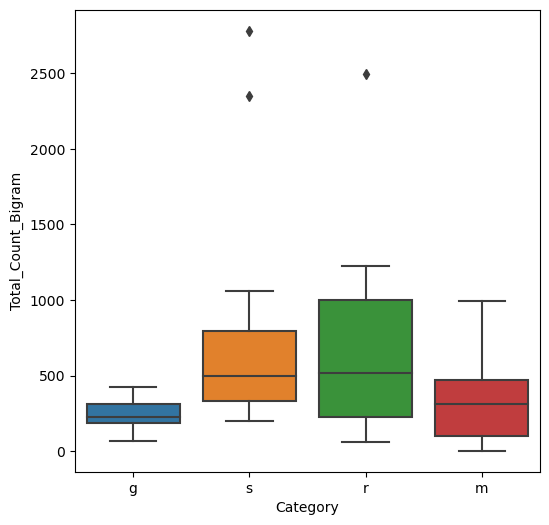

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 加载数据
df = pd.read_excel('./basic_stats/file_stats_bank.xlsx')
#df = pd.read_excel('./basic_stats/file_stats_life.xlsx')
#df = pd.read_excel('./basic_stats/file_stats_property.xlsx')
df = df[df['Category'] != 'all']

plt.figure(figsize=(6, 6))
# 绘制箱线图和散点图
#sns.boxplot(x='Category', y='Total_Count_Unigram', data=df) 
#sns.boxplot(x='Category', y='Different_Unigrams', data=df)
#sns.boxplot(x='Category', y='TTR_Unigram500', data=df)
#sns.boxplot(x='Category', y='Entropy_Unigram500', data=df)
#sns.boxplot(x='Category', y='Simpson_Unigram500', data=df)
#sns.boxplot(x='Category', y=np.log10(df['Simpson_Unigram500']), data=df)

sns.boxplot(x='Category', y='Total_Count_Bigram', data=df) 
#sns.boxplot(x='Category', y='Different_Bigrams', data=df)
#sns.boxplot(x='Category', y='TTR_Bigram500', data=df)
#sns.boxplot(x='Category', y='Entropy_Bigram500', data=df)
#sns.boxplot(x='Category', y=np.log10(df['Simpson_Bigram500']), data=df)
#sns.boxplot(x='Category', y=df['Simpson_Bigram500'], data=df)
plt.show()

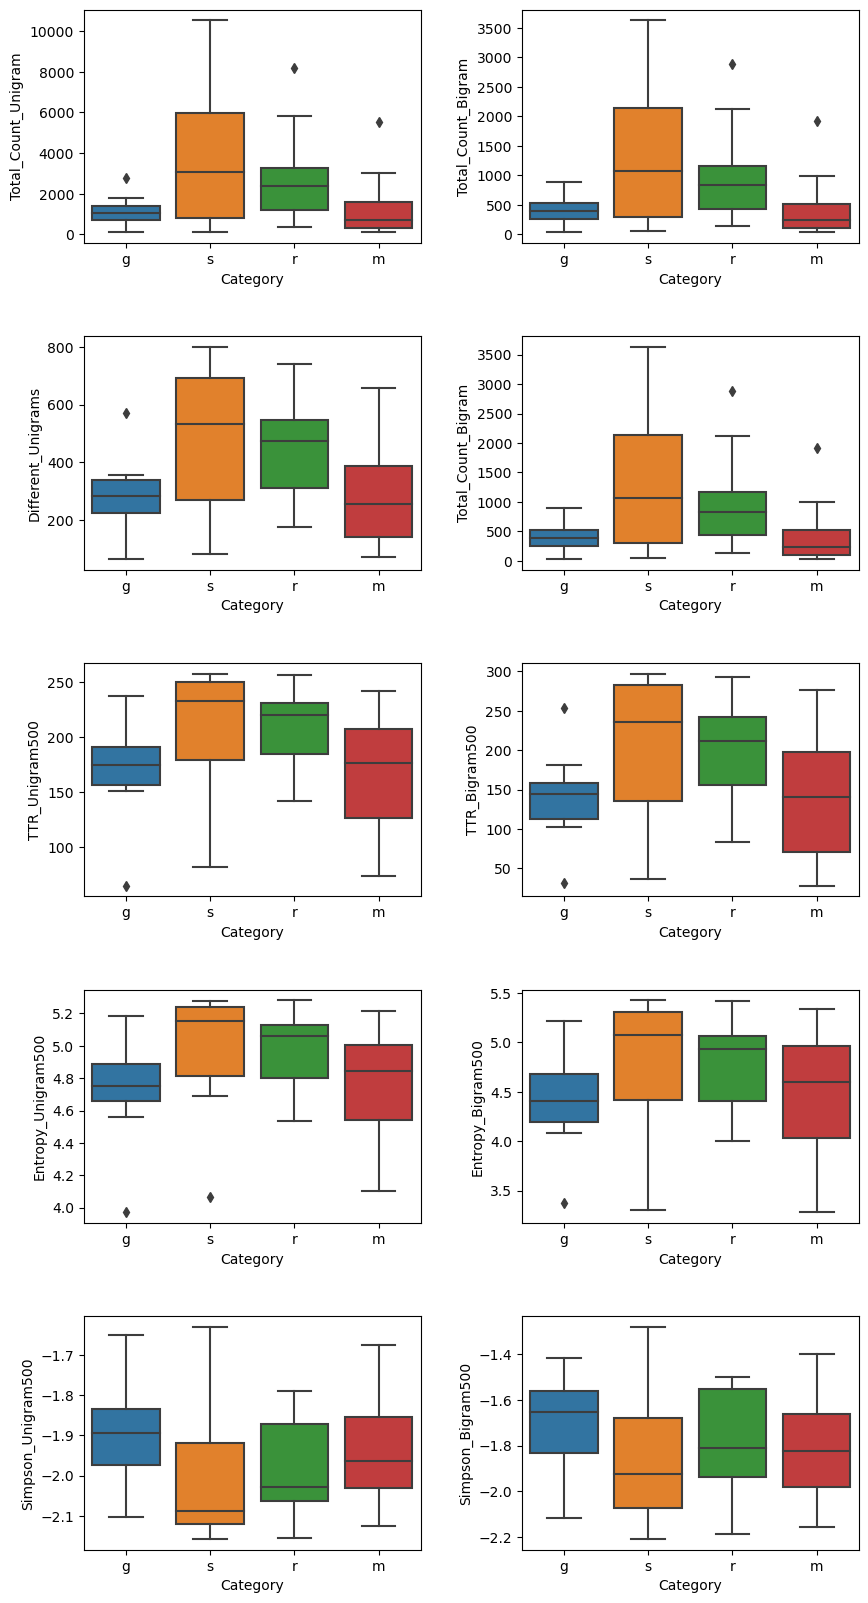

In [88]:
#df = pd.read_excel('./basic_stats/file_stats_bank.xlsx')
df = pd.read_excel('./basic_stats/file_stats_life.xlsx')
df = df[df['Category'] != 'all']

# Initialize figure
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Define column names for each subplot
columns = [
    'Total_Count_Unigram', 'Total_Count_Bigram',
    'Different_Unigrams', 'Total_Count_Bigram',
    'TTR_Unigram500','TTR_Bigram500', 
    'Entropy_Unigram500', 'Entropy_Bigram500',
    'Simpson_Unigram500', 'Simpson_Bigram500'
]

# Plot each boxplot in its respective subplot position
for i, col in enumerate(columns):
    row, col_index = divmod(i, 2)    
    # Apply log transformation for Simpson columns
    if col in ['Simpson_Unigram500', 'Simpson_Bigram500']:
        sns.boxplot(x='Category', y=np.log10(df[col]), data=df, ax=axes[row, col_index])
    else:
        sns.boxplot(x='Category', y=col, data=df, ax=axes[row, col_index])

plt.show()

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Corpus(name, content):
    pattern = re.compile(r'([^。，；！？]+)[。，；！？]')  # 斷句
    sentence = re.findall(pattern, content)
    return sentence

catList = ['g', 's', 'r', 'm', 'f+l']
for i in catList:
    corpus = Corpus(i, category_data_len[i])
    print(corpus)

    corpusTFIDF = []
    for sentence in corpus:
        # Keep only Chinese characters
        chinese_only = re.sub(r'[^\u4e00-\u9fff]', '', sentence)
        # Segment with jieba
        jieba.load_userdict('mydictionary.txt')
        segmented = ' '.join(jieba.cut(chinese_only, cut_all=False))
        corpusTFIDF.append(segmented)
    print(corpusTFIDF)
    # 加載中文停用詞
    with open('baiducnhit_stopwords.txt', 'r', encoding='utf-8') as f:
        stop_words = [line.strip() for line in f.readlines()]

    vectorizer = TfidfVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(corpusTFIDF)
    feature_names = vectorizer.get_feature_names_out()
    scores = X.toarray()

    # 計算每個詞在所有文檔中的最大TF-IDF分數
    average_scores = np.mean(scores, axis=0)

    # 將詞彙和它們的最大TF-IDF分數結合，並按分數降序排列
    sorted_keywords = sorted(zip(feature_names, average_scores), key=lambda x: x[1], reverse=True)
    print(sorted_keywords)
    # 輸出TF-IDF分數最高的詞
    print(f"{i}類別中的關鍵詞：")
    for word, score in sorted_keywords[:10]:  # 假設只顯示前10個
        print(f"{word}: {score}")

# TextRank

In [ ]:
import jieba
import jieba.analyse

def Corpus(name, content):
    pattern = re.compile(r'([^。，；！？]+)[。，；！？]')  # 斷句
    sentence = re.findall(pattern, content)
    return sentence

catList = ['g', 's', 'r', 'm', 'f+l']
for i in catList:
    corpus = Corpus(i, category_data_len[i])
    print(corpus)

    corpusTFIDF = []
    for sentence in corpus:
        # Keep only Chinese characters
        chinese_only = re.sub(r'[^\u4e00-\u9fff]', '', sentence)
        # Segment with jieba
        jieba.load_userdict('mydictionary.txt')
        segmented = ' '.join(jieba.cut(chinese_only, cut_all=False))
        corpusTFIDF.append(segmented)
    print(corpusTFIDF)
    # 加載中文停用詞
    with open('baiducnhit_stopwords.txt', 'r', encoding='utf-8') as f:
        stop_words = [line.strip() for line in f.readlines()]

    # 假設 `full_text` 是您合併後的「治理」類別中所有文檔的完整文本
    full_text = ' '.join(corpusTFIDF)  # 如果corpusTFIDF已經是預處理後的文本列表

    # 使用jieba的TextRank功能提取關鍵詞
    keywords = jieba.analyse.textrank(full_text, topK=10, withWeight=True)
    print(f"{i}類別中的關鍵詞：")
    # 輸出關鍵詞及其相對重要性
    for word, weight in keywords:
        print(f"{word}: {weight}")

# Word Frequency.xlsx

In [2]:
from collections import Counter
import math
!pip install jieba
!pip install openpyxl

import jieba
jieba.load_userdict('mydictionary.txt')
import pandas as pd

# read txt to dictionary
#file_path = './data/bankContent/gToContent.txt'
#file_path = './data/insuranceContent/l/cat_to_content_cleaned_life.txt'
file_path = './data/insuranceContent/p/cat_to_content_cleaned_property.txt'

# Initialize the category_data dictionary to store the content of each category
category_data = {}

# Read the text file and populate the category_data dictionary
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        cat, cndata = line.strip().split(' ', 1)  # Adjusted to correctly split each line
        category_data[cat] = cndata
print(category_data.keys())

# segment words in each value of category_data using jieba
segmented_data = {}
for cat, cndata in category_data.items():
    #for cat in categories:
        words = jieba.cut(cndata, cut_all=False)
        segmented_data[cat] = [w for w in words if len(w) >= 2]
print(segmented_data.keys())       
print(segmented_data['g']) 

# Define a mapping for filenames
#filename_mapping = {
#    'g': 'bank_g',
#    's': 'bank_s',
#    'r': 'bank_r',
#    'm': 'bank_m',
#    'f': 'bank_f',
#    'l': 'bank_l',
#    'f+l': 'bank_f+l',
#    'All': 'bank_all'
#}

#filename_mapping = {
#    'g': 'life_g',
#    's': 'life_s',
#    'r': 'life_r',
#    'm': 'life_m',
#    'all': 'life_all'
#}

filename_mapping = {
    'g': 'property_g',
    's': 'property_s',
    'r': 'property_r',
    'm': 'property_m',
    'all': 'property_all'
}

# Calculate frequency and probability for each category
for cat, words in segmented_data.items():
    results = []
    word_counts = Counter(words)
    total_words = sum(word_counts.values())
    for word, count in word_counts.items():
        probability = count / total_words
        results.append({"category": cat, "word": word, "frequency": count, "probability": probability})
    # Convert the results into a DataFrame
    df_results = pd.DataFrame(results)
    df_resultsSorted = df_results.sort_values(by='frequency', ascending=False)

    # Use the category to filename mapping for the Excel file name, handling special characters
    excel_path = f'{filename_mapping.get(cat, cat)}_freq.xlsx'
    df_resultsSorted.to_excel(excel_path, index=False)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache


Loading model cost 0.465 seconds.
Prefix dict has been built successfully.


dict_keys(['g', 's', 'r', 'm', 'all'])
dict_keys(['g', 's', 'r', 'm', 'all'])
['治理', '氣候', '治理', '架構', '隨著', '全球', '氣候變遷', '意識', '上升', '泰產險', '意識', '企業', '正面', '臨著', '前所未有', '風險', '挑戰為', '確保', '企業', '能夠', '永續', '穩定', '發展', '泰產險', '建立', '有效', '氣候', '治理', '架構', '透過', '董事會', '企業', '永續', '委員會', '風險', '管理', '委員會', '權責', '單位', '各業務', '單位', '由上而下', '推動', '針對', '氣候變遷', '風險', '制定', '相應', '管理', '措施', '減緩', '調適', '氣候變遷', '帶來', '影響', '確保', '企業', '能夠', '變化', '環境', '保持', '穩定', '發展', '董事會', '泰產險', '董事會', '氣候', '相關', '議題', '最高', '治理', '單位', '負責', '核定', '風險', '胃納', '氣候', '相關', '風險', '機會', '管理', '負有', '終責任', '企業', '永續', '委員會', '董事會', '轄下', '設立', '企業', '永續', '委員會', '董事長', '擔任', '主任', '委員', '總經理', '總幹事', '風險', '管理部', '事務局', '組成', '小組', '包括', '綠色', '商品', '小組', '永續', '營運', '組責任', '投資小組', '社會責', '任小組', '永續', '治理', '小組及', '組委員會', '負責', '監督', '指導', '氣候', '相關', '風險', '機會', '管理', '情形', '每年', '至少', '召開', '二次', '會議', '得視', '需要', '隨時', '召開會', '議並', '定期', '董事會', '報告', '執行', '成果', '風險', '管理', '委員會', '董事會', '轄下', '設立'

# Clustering
## Prepare 全部/top500/top100/每類top10詞

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Step 1:Load the Full Datasets and Identify Top 10 Words
file_paths_full = {
    "bank_g": "./word_frequency/bank_g_freq.xlsx",
    "bank_s": "./word_frequency/bank_s_freq.xlsx",
    "bank_r": "./word_frequency/bank_r_freq.xlsx",
    "bank_m": "./word_frequency/bank_m_freq.xlsx",
    #"life_g": "./word_frequency/life_g_freq.xlsx",
    #"life_s": "./word_frequency/life_s_freq.xlsx",
    #"life_r": "./word_frequency/life_r_freq.xlsx",
    #"life_m": "./word_frequency/life_m_freq.xlsx",
    #"property_g": "./word_frequency/property_g_freq.xlsx",
    #"property_s": "./word_frequency/property_s_freq.xlsx",
    #"property_r": "./word_frequency/property_r_freq.xlsx",
    #"property_m": "./word_frequency/property_m_freq.xlsx",
}
df_full = {category: pd.read_excel(filepath) for category, filepath in file_paths_full.items()}
df_full

{'bank_g':      category word  frequency
 0           g   風險        728
 1           g   氣候        622
 2           g   管理        562
 3           g   相關        340
 4           g   永續        253
 ...       ...  ...        ...
 2013        g   嚴實          1
 2014        g   地區          1
 2015        g   其職          1
 2016        g  責範圍          1
 2017        g  之訂定          1
 
 [2018 rows x 3 columns],
 'bank_s':      category  word  frequency
 0           s    風險       1627
 1           s    氣候        938
 2           s    情境        748
 3           s    分析        556
 4           s    轉型        529
 ...       ...   ...        ...
 6549        s   表綠色          1
 6550        s  中央政府          1
 6551        s   各機關          1
 6552        s  公務車輛          1
 6553        s   服務低          1
 
 [6554 rows x 3 columns],
 'bank_r':      category  word  frequency
 0           r    風險       2171
 1           r    氣候       1026
 2           r    管理        701
 3           r    相關        44

In [3]:
def extract_top10_words(df):
    return set(df.nlargest(10, 'frequency')['word'])

In [4]:
## Example:
top10_words_per_category = {cat: extract_top10_words(df) for cat, df in df_full.items()}
print(top10_words_per_category)
top10_words = set().union(*top10_words_per_category.values())
top10_words  = list(top10_words)
print(len(top10_words), top10_words)

{'bank_g': {'委員會', '永續', '氣候變遷', '風險', '董事會', '管理', '本行', '相關', '氣候', '執行'}, 'bank_s': {'分析', '永續', '氣候變遷', '風險', '本行', '相關', '影響', '氣候', '情境', '轉型'}, 'bank_r': {'分析', '產業', '風險', '管理', '評估', '本行', '相關', '授信', '氣候', '情境'}, 'bank_m': {'產業', '排放', '風險', '管理', '本行', '相關', '投融資', '氣候', '溫室氣體', '目標'}}
21 ['分析', '產業', '排放', '董事會', '管理', '評估', '相關', '投融資', '影響', '氣候', '情境', '目標', '委員會', '永續', '氣候變遷', '風險', '本行', '授信', '溫室氣體', '執行', '轉型']


In [5]:
# Load the top 500 words from the combined dataset "bank_all_freq.xlsx"
all_path = "./word_frequency/bank_all_freq.xlsx"
#all_path = "./word_frequency/life_all_freq.xlsx"
#all_path = "./word_frequency/property_all_freq.xlsx"

df_all = pd.read_excel(all_path)

# Get the top 500 words based on frequency across all categories
top500_words = set(df_all.nlargest(500, 'frequency')['word'].tolist())
top100_words = set(df_all.nlargest(100, 'frequency')['word'].tolist())
all_words = set(df_all['word'].tolist())
print(len(all_words))

10366


## yue 

In [6]:
def compute_yue(full_df1, full_df2, top_words):
    # Merge the two filtered datasets on 'word' to align the data
    union_words = top_words
    union_df = pd.DataFrame({'word': list(union_words)})
    #print(len(union_df))

    # Ensure all union words are included in both datasets, filling missing frequencies with 0
    df1_union_freq = pd.merge(union_df, full_df1, on='word', how='left').fillna({'frequency': 0})
    df2_union_freq = pd.merge(union_df, full_df2, on='word', how='left').fillna({'frequency': 0})
    #print(df1_union_freq)
    #print(df2_union_freq)
    # Calculate probabilities
    total_freq_1 = df1_union_freq['frequency'].sum()
    total_freq_2 = df2_union_freq['frequency'].sum()
    df1_union_freq['probability'] = df1_union_freq['frequency'] / total_freq_1
    df2_union_freq['probability'] = df2_union_freq['frequency'] / total_freq_2

    # Merge on 'word' to compute Yue Index components
    merged_df = pd.merge(df1_union_freq, df2_union_freq, on='word', suffixes=('_1', '_2'))
    #print(merged_df)
    sumpq = (merged_df['probability_1'] * merged_df['probability_2']).sum()
    sumpqds = ((merged_df['probability_1'] - merged_df['probability_2']) ** 2).sum()

    # Calculate Yue Index
    yue_index = sumpq / (sumpq + sumpqds)
    return yue_index

In [11]:
# Example of using the function with two full datasets
yue_index100 = compute_yue(df_full['life_g'], df_full['life_m'], top100_words)
yue_index100

0.4271628450058923

## cosine

In [7]:
def compute_cosine(full_df1, full_df2, top_words):
    union_words = top_words
    union_df = pd.DataFrame({'word': list(union_words)})
    #print(union_df)
    
    df1_union_freq = pd.merge(union_df, full_df1, on='word', how='left').fillna({'frequency': 0})
    df2_union_freq = pd.merge(union_df, full_df2, on='word', how='left').fillna({'frequency': 0})
    #print(df1_union_freq, df2_union_freq)

   # 创建两个向量，表示两个类别的词频
    vec1 = df1_union_freq['frequency'].tolist()
    vec2 = df2_union_freq['frequency'].tolist()

    # 计算余弦相似度
    """ related documents j and q are in the concept space by comparing the vectors :
    cosine  = ( V1 * V2 ) / ||V1|| x ||V2|| """
    cosine_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
    return cosine_sim        


## jaccard

In [8]:
def compute_jaccard(full_df1, full_df2, top_n):
    # 1. 篩選前10大詞
    top_words1 = full_df1.nlargest(top_n, 'frequency')['word'].tolist()
    top_words2 = full_df2.nlargest(top_n, 'frequency')['word'].tolist()
    #print(top_words1)
    #print(top_words2)
    # 將篩選出的詞轉換為集合
    set1 = set(top_words1)
    set2 = set(top_words2)
    #print(set1)
    #print(set2)

    # 2. 計算交集和聯集
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    #print(intersection)
    #print(union)

    # 3. 計算 Jaccard 指數
    jaccard_index = intersection / union if union != 0 else 0
    
    return jaccard_index

In [25]:
jaccard100 = compute_jaccard(df_full['life_g'], df_full['life_m'], top_n=10)
jaccard100

['風險', '氣候', '管理', '相關', '永續', '公司', '董事會', '委員會', '氣候變遷', '治理']
['風險', '氣候', '目標', '投資', '管理', '公司', '指標', '排放', '溫室氣體', '產業']
{'治理', '董事會', '永續', '公司', '風險', '委員會', '管理', '氣候變遷', '氣候', '相關'}
{'公司', '風險', '目標', '投資', '管理', '指標', '排放', '氣候', '溫室氣體', '產業'}
4
16


0.25

In [26]:
# Example of using the function with two full datasets
cos10 = compute_cosine(df_full['life_g'], df_full['life_m'], top10_words)
cos10

    word
0     分析
1    董事會
2     風險
3     影響
4     投資
5     管理
6     指標
7   氣候變遷
8     治理
9     相關
10    產業
11    情境
12    永續
13    公司
14    目標
15   委員會
16    排放
17    氣候
18  溫室氣體
19    轉型
20    評估


0.7111519861797764

In [30]:
import pandas as pd
import numpy as np

In [9]:
#Step 3: Calculate Yue Index for Each Pair of Categories
categories = list(df_full.keys())
yue_top10 = pd.DataFrame(index=categories, columns=categories)
cosine_top10 = pd.DataFrame(index=categories, columns=categories)
jaccard_top10 = pd.DataFrame(index=categories, columns=categories)

for i, cat1 in enumerate(categories):
    for cat2 in categories[i+1:]:  # Ensure each pair is processed only once
        index = compute_yue(df_full[cat1], df_full[cat2], top10_words)
        index_cosine = compute_cosine(df_full[cat1], df_full[cat2], top10_words)
        index_jaccard = compute_jaccard(df_full[cat1], df_full[cat2], top_n=10)
        
        yue_top10.at[cat1, cat2] = index
        yue_top10.at[cat2, cat1] = index  # Symmetric matrix
        cosine_top10.at[cat1, cat2] = index_cosine
        cosine_top10.at[cat2, cat1] = index_cosine
        jaccard_top10.at[cat1, cat2] = index_jaccard
        jaccard_top10.at[cat2, cat1] = index_jaccard

# Fill diagonal with 1s for self-comparison
np.fill_diagonal(yue_top10.values, 1)
yue_top10

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.631856,0.765762,0.557747
bank_s,0.631856,1,0.886028,0.721607
bank_r,0.765762,0.886028,1,0.620634
bank_m,0.557747,0.721607,0.620634,1


In [10]:
np.fill_diagonal(cosine_top10.values, 1)
cosine_top10

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.78563,0.86743,0.75437
bank_s,0.78563,1,0.951031,0.848442
bank_r,0.86743,0.951031,1,0.803369
bank_m,0.75437,0.848442,0.803369,1


In [11]:
np.fill_diagonal(jaccard_top10.values, 1)
jaccard_top10

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.428571,0.333333,0.333333
bank_s,0.428571,1,0.428571,0.25
bank_r,0.333333,0.428571,1,0.428571
bank_m,0.333333,0.25,0.428571,1


In [12]:
#Step 3: Calculate Yue Index for Each Pair of Categories
categories = list(df_full.keys())
yue_top500 = pd.DataFrame(index=categories, columns=categories)
cosine_top500 = pd.DataFrame(index=categories, columns=categories)
jaccard_top500 = pd.DataFrame(index=categories, columns=categories)

for i, cat1 in enumerate(categories):
    for cat2 in categories[i+1:]:  # Ensure each pair is processed only once
        index = compute_yue(df_full[cat1], df_full[cat2], top500_words)
        index_cosine = compute_cosine(df_full[cat1], df_full[cat2], top500_words)
        index_jaccard = compute_jaccard(df_full[cat1], df_full[cat2], top_n=500)
        yue_top500.at[cat1, cat2] = index
        yue_top500.at[cat2, cat1] = index  # Symmetric matrix
        cosine_top500.at[cat1, cat2] = index_cosine
        cosine_top500.at[cat2, cat1] = index_cosine
        jaccard_top500.at[cat1, cat2] = index_jaccard
        jaccard_top500.at[cat2, cat1] = index_jaccard

# Fill diagonal with 1s for self-comparison
np.fill_diagonal(yue_top500.values, 1)
yue_top500

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.520499,0.698637,0.39444
bank_s,0.520499,1,0.836944,0.694894
bank_r,0.698637,0.836944,1,0.533566
bank_m,0.39444,0.694894,0.533566,1


In [13]:
np.fill_diagonal(cosine_top500.values, 1)
cosine_top500

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.744508,0.836135,0.673783
bank_s,0.744508,1,0.936284,0.83537
bank_r,0.836135,0.936284,1,0.760364
bank_m,0.673783,0.83537,0.760364,1


In [14]:
np.fill_diagonal(jaccard_top500.values, 1)
jaccard_top500

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.383126,0.426534,0.364256
bank_s,0.383126,1,0.612903,0.577287
bank_r,0.426534,0.612903,1,0.485884
bank_m,0.364256,0.577287,0.485884,1


In [15]:
#Step 3: Calculate Yue Index for Each Pair of Categories
categories = list(df_full.keys())
yue_top100 = pd.DataFrame(index=categories, columns=categories)
cosine_top100 = pd.DataFrame(index=categories, columns=categories)
jaccard_top100 = pd.DataFrame(index=categories, columns=categories)

for i, cat1 in enumerate(categories):
    for cat2 in categories[i+1:]:  # Ensure each pair is processed only once
        index = compute_yue(df_full[cat1], df_full[cat2], top100_words)
        index_cosine = compute_cosine(df_full[cat1], df_full[cat2], top100_words)
        index_jaccard = compute_jaccard(df_full[cat1], df_full[cat2], top_n=100)
        yue_top100.at[cat1, cat2] = index
        yue_top100.at[cat2, cat1] = index  # Symmetric matrix
        cosine_top100.at[cat1, cat2] = index_cosine
        cosine_top100.at[cat2, cat1] = index_cosine
        jaccard_top100.at[cat1, cat2] = index_jaccard
        jaccard_top100.at[cat2, cat1] = index_jaccard

# Fill diagonal with 1s for self-comparison
np.fill_diagonal(yue_top100.values, 1)
yue_top100

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.552521,0.719885,0.455849
bank_s,0.552521,1,0.855531,0.726572
bank_r,0.719885,0.855531,1,0.586223
bank_m,0.455849,0.726572,0.586223,1


In [16]:
np.fill_diagonal(cosine_top100.values, 1)
cosine_top100

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.759504,0.84754,0.709669
bank_s,0.759504,1,0.941907,0.850676
bank_r,0.84754,0.941907,1,0.785707
bank_m,0.709669,0.850676,0.785707,1


In [17]:
np.fill_diagonal(jaccard_top100.values, 1)
jaccard_top100

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.265823,0.324503,0.25
bank_s,0.265823,1,0.612903,0.5625
bank_r,0.324503,0.612903,1,0.449275
bank_m,0.25,0.5625,0.449275,1


In [18]:
#Step 3: Calculate Yue Index for Each Pair of Categories
categories = list(df_full.keys())
yue_all = pd.DataFrame(index=categories, columns=categories)
cosine_all = pd.DataFrame(index=categories, columns=categories)
jaccard_all = pd.DataFrame(index=categories, columns=categories)

for i, cat1 in enumerate(categories):
    for cat2 in categories[i+1:]:  # Ensure each pair is processed only once
        index = compute_yue(df_full[cat1], df_full[cat2], all_words)
        index_cosine = compute_cosine(df_full[cat1], df_full[cat2], all_words)
        index_jaccard = compute_jaccard(df_full[cat1], df_full[cat2], top_n=10000000)
        yue_all.at[cat1, cat2] = index
        yue_all.at[cat2, cat1] = index  # Symmetric matrix
        cosine_all.at[cat1, cat2] = index_cosine
        cosine_all.at[cat2, cat1] = index_cosine
        jaccard_all.at[cat1, cat2] = index_jaccard
        jaccard_all.at[cat2, cat1] = index_jaccard

# Fill diagonal with 1s for self-comparison
np.fill_diagonal(yue_all.values, 1)
yue_all

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.484618,0.681775,0.349779
bank_s,0.484618,1,0.816566,0.680203
bank_r,0.681775,0.816566,1,0.501292
bank_m,0.349779,0.680203,0.501292,1


In [19]:
# Fill diagonal with 1s for self-comparison
np.fill_diagonal(cosine_all.values, 1)
cosine_all

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.741047,0.833257,0.666344
bank_s,0.741047,1,0.934287,0.830223
bank_r,0.833257,0.934287,1,0.754458
bank_m,0.666344,0.830223,0.754458,1


In [20]:
np.fill_diagonal(jaccard_all.values, 1)
jaccard_all

,bank_g,bank_s,bank_r,bank_m
bank_g,1,0.157127,0.189937,0.193035
bank_s,0.157127,1,0.359963,0.298841
bank_r,0.189937,0.359963,1,0.296439
bank_m,0.193035,0.298841,0.296439,1


In [21]:
# 檢查是否有非有限值
print(cosine_top500.isnull().sum())  # 檢查 NaN 值
cosine_top500_cleaned = cosine_top500.fillna(0)
#print(np.isfinite(cosine_top500).all())  # 檢查是否所有值都是有限的

bank_g    0
bank_s    0
bank_r    0
bank_m    0
dtype: int64


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [113]:
def draw_clustermap(similarity_df, title):

    column_mapping = {
    'bank_g': '治理',
    'bank_s': '策略',
    'bank_r': '風險',
    'bank_m': '指標',
    #'life_g': '治理',
    #'life_s': '策略',
    #'life_r': '風險',
    #'life_m': '指標',
    #'property_g': '治理',
    #'property_s': '策略',
    #'property_r': '風險',
    #'property_m': '指標',
}
    # 使用列名映射更新 DataFrame 的索引和列名
    mapped_df = similarity_df.rename(index=column_mapping, columns=column_mapping)

    # 绘制聚类热图
    g = sns.clustermap(
        mapped_df,
        cmap="YlGnBu",
        annot=True,# 顯示數字
        fmt=".2f",  # 數字格式
        annot_kws={"size": 15, "weight": "bold"},  # 數字字體大小
        linewidths=0.5,  # 熱圖邊框線寬
        vmin=0,
        vmax=1,
        figsize=(8, 6),  # 图表尺寸
        tree_kws={'linewidths': 1.5},  # 調整聚類樹線條寬度
        cbar_pos=None  # 完全禁用色標  
    )

    # 调整标题的位置，使其位于整个图的顶部，不干扰热图和聚类树
    g.fig.suptitle(title, x=0.5, y=1.02, fontsize=20, weight="bold")
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=15, weight="bold", rotation=0)  # X轴标签旋转
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=15, weight="bold", rotation=0)   # Y轴标签保持不旋转
    
    # 保存圖片 (高解析度輸出)
    plt.savefig(f'{title}.png', dpi=1000, bbox_inches='tight')
    plt.show()

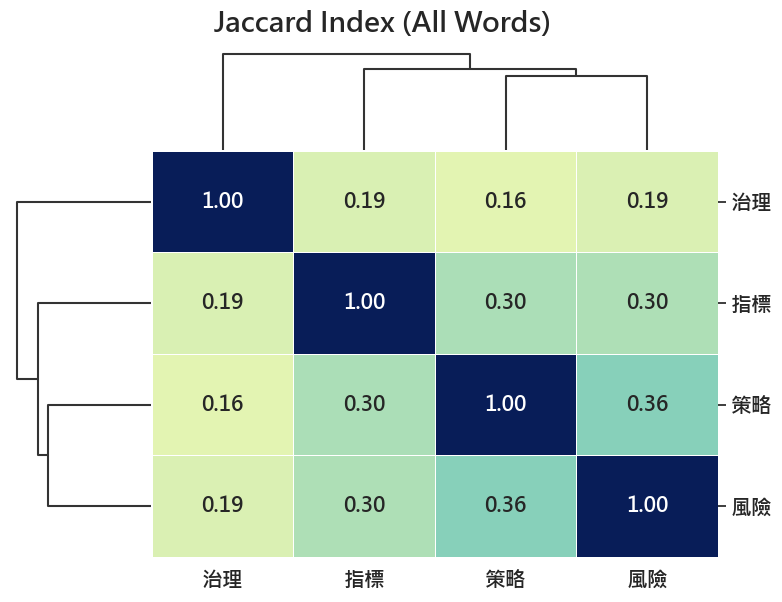

In [115]:
draw_clustermap(jaccard_all.astype(float), "Jaccard Index (All Words)") #, column_mapping

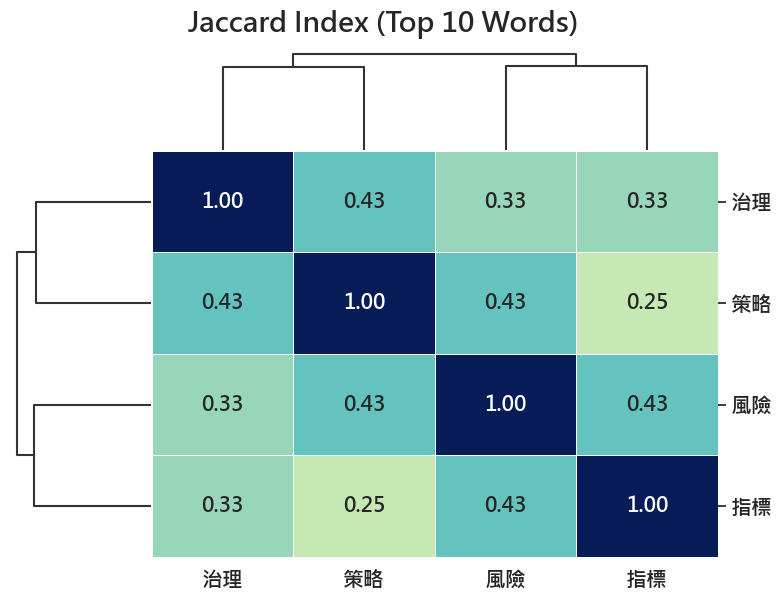

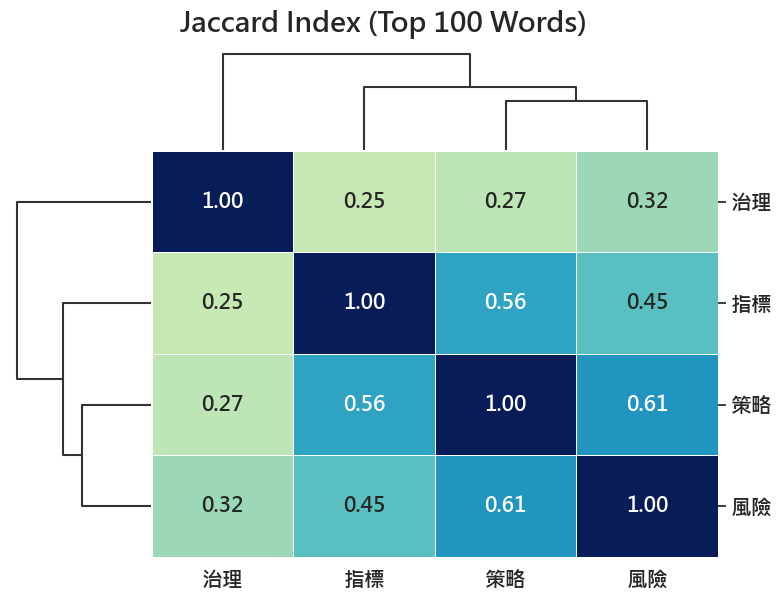

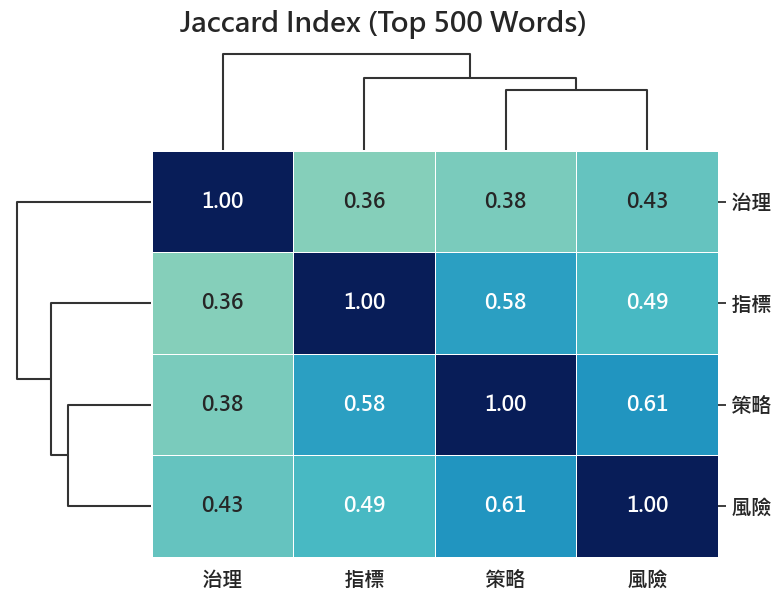

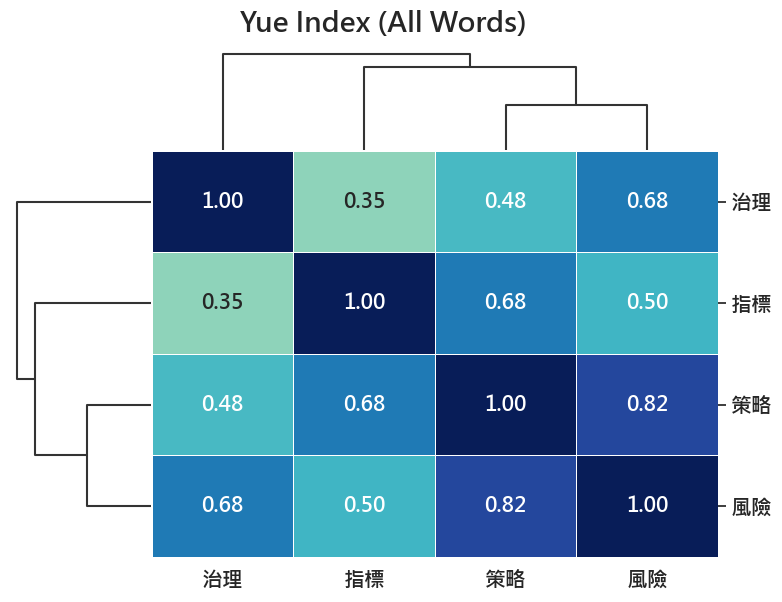

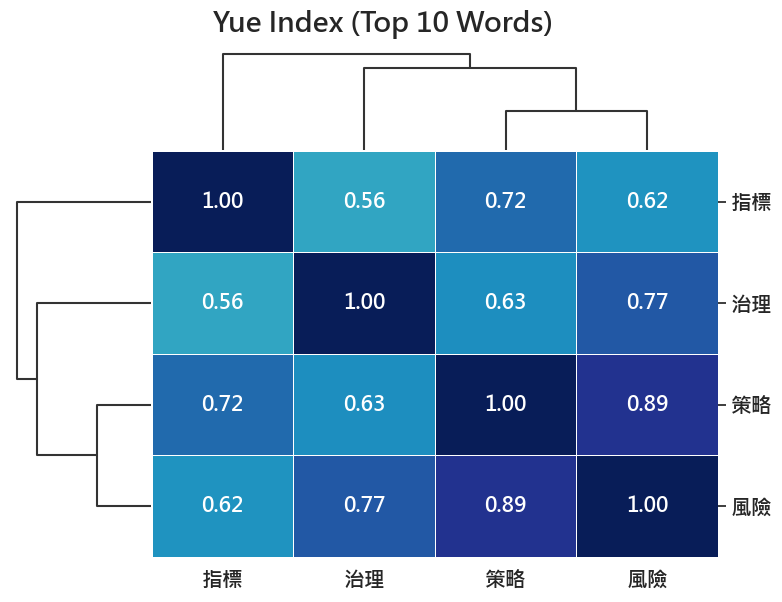

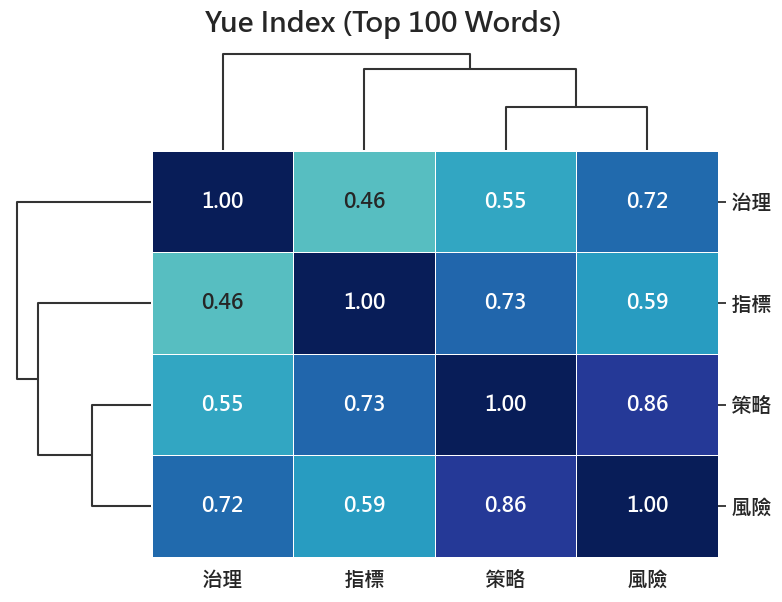

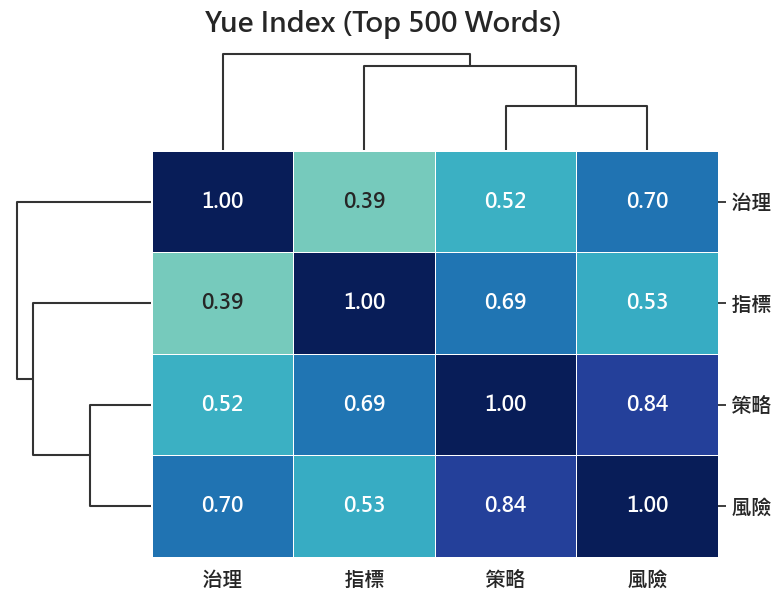

In [116]:
#draw_clustermap(jaccard_all.astype(float), "Jaccard Index (All Words)") #, column_mapping
draw_clustermap(jaccard_top10.astype(float), "Jaccard Index (Top 10 Words)")
draw_clustermap(jaccard_top100.astype(float), "Jaccard Index (Top 100 Words)")
draw_clustermap(jaccard_top500.astype(float), "Jaccard Index (Top 500 Words)")

draw_clustermap(yue_all.astype(float), "Yue Index (All Words)") #, column_mapping
draw_clustermap(yue_top10.astype(float), "Yue Index (Top 10 Words)")
draw_clustermap(yue_top100.astype(float), "Yue Index (Top 100 Words)")
draw_clustermap(yue_top500.astype(float), "Yue Index (Top 500 Words)")

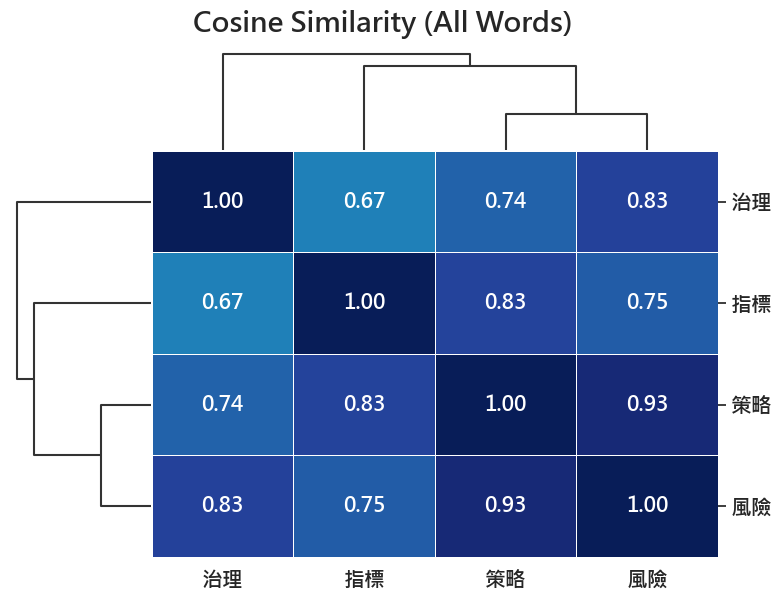

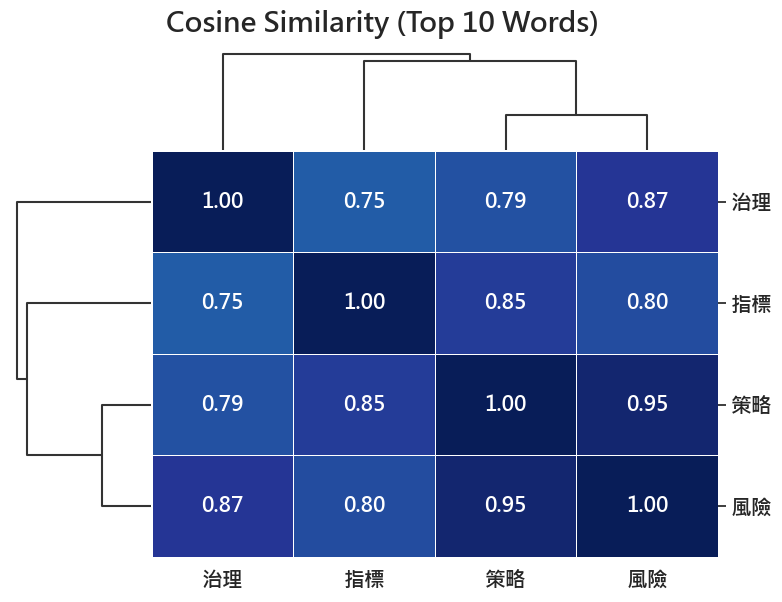

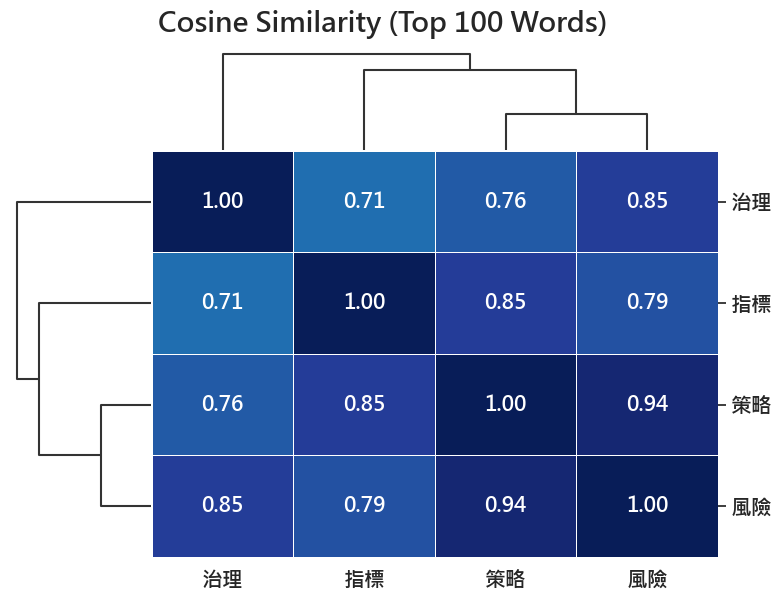

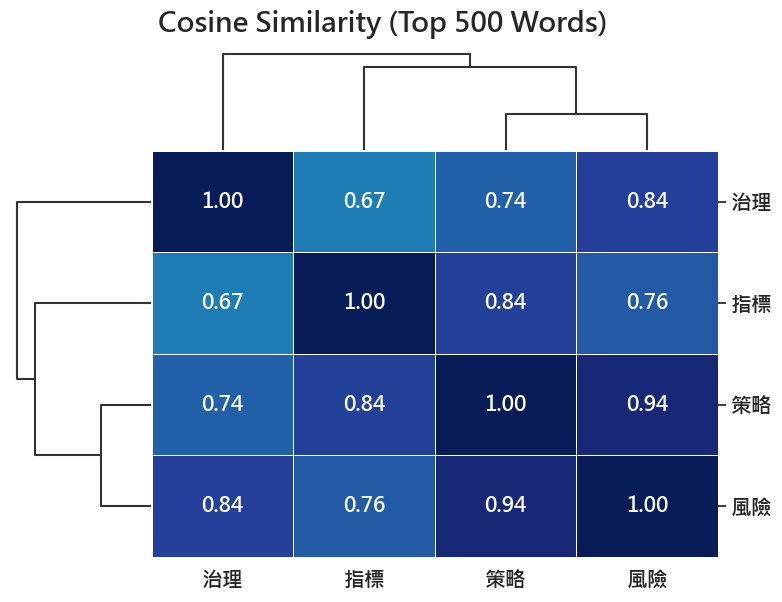

In [117]:
draw_clustermap(cosine_all.astype(float), "Cosine Similarity (All Words)")
draw_clustermap(cosine_top10.astype(float), "Cosine Similarity (Top 10 Words)")
draw_clustermap(cosine_top100.astype(float), "Cosine Similarity (Top 100 Words)")
draw_clustermap(cosine_top500.astype(float), "Cosine Similarity (Top 500 Words)")

# Similarity_Pearson Spearman

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from itertools import combinations

def CorrelationPearsonSpearman(df1, df2, name1, name2):
    # 取得兩者 bigrams 的聯集
    all_bigrams = set(df1['word']).union(set(df2['word']))

    # 將聯集的 bigrams 轉成列表
    all_bigrams_list = list(all_bigrams)

    # 將兩個檔案的資料擴充為聯集後的 bigrams
    df1_all = pd.DataFrame(all_bigrams_list, columns=['word'])
    df1_all = pd.merge(df1_all, df1, how='left', on='word').fillna(0)
    df2_all = pd.DataFrame(all_bigrams_list, columns=['word'])
    df2_all = pd.merge(df2_all, df2, how='left', on='word').fillna(0)

    # 提取 counts 欄位的數值
    df1List = df1_all['frequency'].tolist()
    df2List = df2_all['frequency'].tolist()

    # 計算 Pearson 和 Spearman 相關係數
    pearson_corr, _ = pearsonr(df1List, df2List)
    spearman_corr, _ = spearmanr(df1List, df2List)

    return pearson_corr, spearman_corr

# 讀取 Excel 檔案
#dfg = pd.read_excel('bank_g_freqProb.xlsx')
#dfs = pd.read_excel('bank_s_freqProb.xlsx')
#dfr = pd.read_excel('bank_r_freqProb.xlsx')
#dfm = pd.read_excel('bank_m_freqProb.xlsx')
#dffl = pd.read_excel('bank_f+l_freqProb.xlsx')

#dfg = pd.read_excel('bank_g_freqProb_top10inCat.xlsx')
#dfs = pd.read_excel('bank_s_freqProb_top10inCat.xlsx')
#dfr = pd.read_excel('bank_r_freqProb_top10inCat.xlsx')
#dfm = pd.read_excel('bank_m_freqProb_top10inCat.xlsx')
#dffl = pd.read_excel('bank_f+l_freqProb_top10inCat.xlsx')

dfg = pd.read_excel('bank_g_freqProb_top500inAll.xlsx')
dfs = pd.read_excel('bank_s_freqProb_top500inAll.xlsx')
dfr = pd.read_excel('bank_r_freqProb_top500inAll.xlsx')
dfm = pd.read_excel('bank_m_freqProb_top500inAll.xlsx')
dffl = pd.read_excel('bank_f+l_freqProb_top500inAll.xlsx')

dfList = [dfg, dfs, dfr, dfm, dffl]
names = ['治理', '策略', '風險', '指標', '非要素']

# 創建相關係數矩陣
correlation_matrix_pearson = pd.DataFrame(index=names, columns=names)
correlation_matrix_spearman = pd.DataFrame(index=names, columns=names)

# 使用迴圈傳遞每一對 DataFrame 給函數 #combinations(dfList, 2) 排組取2
for (df1, name1), (df2, name2) in combinations(zip(dfList, names), 2):
    pearson_corr, spearman_corr = CorrelationPearsonSpearman(df1, df2, name1, name2)
    # 填充相關係數矩陣
    correlation_matrix_pearson.loc[name1, name2] = pearson_corr
    correlation_matrix_pearson.loc[name2, name1] = pearson_corr

    correlation_matrix_spearman.loc[name1, name2] = spearman_corr
    correlation_matrix_spearman.loc[name2, name1] = spearman_corr

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# 繪製 Pearson 相關係數矩陣
plt.figure(figsize=(5, 5))
#plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_pearson.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Pearson Correlation Matrix')

# 繪製 Spearman 相關係數矩陣
#plt.subplot(1, 2, 2)
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_spearman.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Spearman Correlation Matrix')

plt.show()

# Barplot (top 10 words)

In [4]:
from pathlib import Path
import pandas as pd

# Re-read the Excel files for each category
dfg = pd.read_excel('./word_frequency/bank_g_freq.xlsx')
dfs = pd.read_excel('./word_frequency/bank_s_freq.xlsx')
dfr = pd.read_excel('./word_frequency/bank_r_freq.xlsx')
dfm = pd.read_excel('./word_frequency/bank_m_freq.xlsx')

# Collect top ten words from all categories using union
words_union = list(set(dfg.nlargest(10, 'frequency')['word']) | 
                   set(dfs.nlargest(10, 'frequency')['word']) | 
                   set(dfr.nlargest(10, 'frequency')['word']) | 
                   set(dfm.nlargest(10, 'frequency')['word']))
print(len(words_union))

# Initialize a DataFrame
df_combined_union = pd.DataFrame({'words': words_union})
#print(df_combined_union)

# Populate the DataFrame with frequencies
for category, df in zip(['g', 's', 'r', 'm'], [dfg, dfs, dfr, dfm]):#, 'f+l', dffl
    freq_map = df.set_index('word')['frequency'].to_dict()
    print(freq_map)
    df_combined_union[category] = df_combined_union['words'].apply(lambda x: freq_map.get(x, 0))

# Sort the DataFrame
df_combined_union_sorted = df_combined_union.sort_values(by=['g'], ascending=[False]) # 's', 'm'], ascending=[False, False, False])

df_combined_union_sorted.rename(columns={'words':'words', 'g':'治理', 's':'策略', 'r':'風險', 'm':'指標', 'f+l':'非要素'}, inplace=True)
df_combined_union_sorted

21
{'風險': 728, '氣候': 622, '管理': 562, '相關': 340, '永續': 253, '董事會': 193, '本行': 190, '委員會': 168, '氣候變遷': 157, '執行': 146, '單位': 131, '治理': 131, '議題': 123, '發展': 123, '政策': 98, '策略': 89, '目標': 79, '監督': 78, '情形': 75, '機會': 69, '負責': 69, '架構': 68, '金融': 67, '機制': 57, '推動': 57, '高階': 57, '小組': 56, '報告': 53, '定期': 51, '總經理': 51, '階層': 50, '企業': 49, '銀行': 46, '以及': 46, '環境': 44, '公司': 44, '訓練': 44, '評估': 44, '影響': 43, '確保': 41, '納入': 40, '經營': 40, '工作': 39, '進行': 38, '職責': 38, '課程': 37, '財務': 37, '年度': 36, '指標': 36, '因應': 35, '組織': 35, '建立': 34, '包含': 34, '子公司': 33, '持續': 33, '揭露': 32, '集團': 32, '強化': 31, '教育': 30, '金控': 30, '有效': 29, '績效': 29, '措施': 29, '陳報': 29, '防線': 29, '擔任': 29, '落實': 28, '核定': 28, '透過': 28, '檢視': 27, '重要': 26, '督導': 26, '董事': 26, '監控': 25, '最高': 25, '專案': 25, '每季': 25, '各項': 24, '包括': 24, '計畫': 24, '董事長': 24, '考量': 24, '訂定': 24, '會議': 23, '作業': 23, '主管': 23, '規範': 23, '達成': 23, '能力': 22, '成果': 22, '營運': 22, '規劃': 22, '主要': 22, '外部': 22, '業務': 22, '重大': 21, '提供': 21, '專業':

,words,治理,策略,風險,指標
8,風險,728,1627,2171,330
20,氣候,622,938,1026,313
7,管理,562,322,701,169
13,相關,340,412,447,160
5,永續,253,370,145,130
1,董事會,193,13,43,17
19,本行,190,395,336,176
9,委員會,168,29,48,27
16,氣候變遷,157,411,277,102
6,執行,146,62,78,35


   words category  counts
0     風險       治理     728
1     氣候       治理     622
2     管理       治理     562
3     相關       治理     340
4     永續       治理     253
..   ...      ...     ...
79    分析       指標     108
80    情境       指標      83
81    轉型       指標     113
82   投融資       指標     179
83    排放       指標     157

[84 rows x 3 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_18664\489746521.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = category_data['words'].apply(
C:\Users\USER\AppData\Local\Temp\ipykernel_18664\489746521.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = category_data['words'].apply(
C:\Users\USER\AppData\Local\Temp\ipykernel_18664\489746521.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

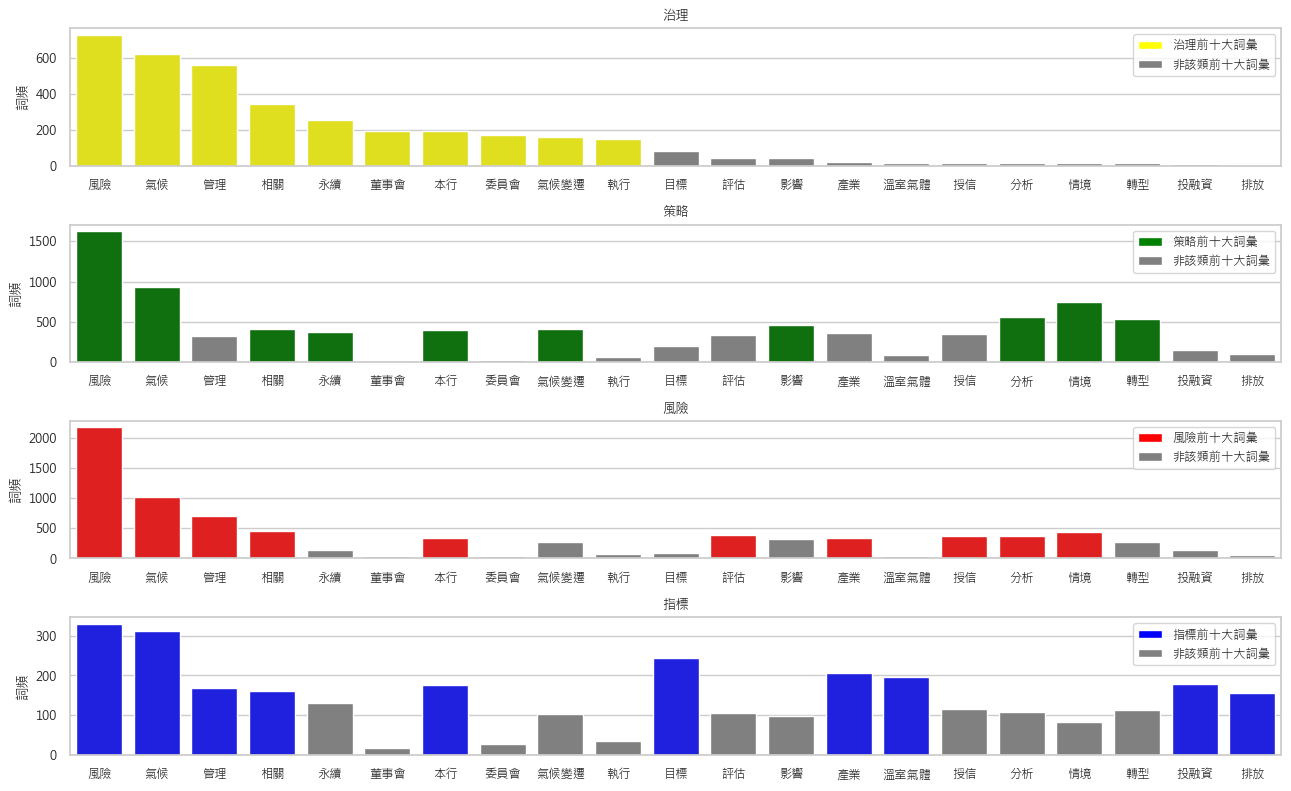

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
#df = pd.read_excel('./top10UnionBarChart.xlsx')
#print(df)

## Sort the DataFrame based on the frequency in category 'g' in descending order
#df_sorted = df.sort_values(by='治理', ascending=False)

# 將 DataFrame 轉換成長格式
df_long = df_combined_union_sorted.melt(id_vars='words', var_name='category', value_name='counts')
print(df_long)

# 設定字體以顯示中文
sns.set(style="whitegrid", font_scale=0.8)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# plt.rcParams['axes.unicode_minus'] = False

# 定义颜色字典
color_dict = {
    '治理': 'yellow',
    '策略': 'green',
    '風險': 'red',
    '指標': 'blue'}#,
    #'非要素': 'brown'


# 计算每个类别的前10高词频，并重置索引
top10_bigrams_per_category = (df_long.groupby('category')
                              .apply(lambda x: x.nlargest(10, 'counts'))
                              .reset_index(drop=True))
# 创建一个大的画布
#fig, axes = plt.subplots(nrows=len(df_long['category'].unique()), ncols=1, figsize=(10, 30))

category_count = len(df_long['category'].unique())
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(13, category_count * 2)) #圖大小,長寬比2:1

# 添加灰色表示其余词频
legend_colors = {**color_dict, '其他詞': 'grey'}

## Exclude 'total' from the list of unique categories to be plotted
#unique_categories = df_long['category'].unique()
#unique_categories_ex = [cat for cat in unique_categories if cat in color_dict.keys()]

# 为每个类别分别绘制柱状图
for i, category in enumerate(df_long['category'].unique()):
    #print(i, category)
    # 筛选当前类别的数据
    category_data = df_long[df_long['category'] == category]
    #print(category_data)
    # 分配颜色
    category_data['color'] = category_data['words'].apply(
        lambda x: color_dict[category] if x in top10_bigrams_per_category[top10_bigrams_per_category['category'] == category]['words'].values else 'grey')
    # 绘制柱状图
    sns.barplot(x='words', y='counts', data=category_data,
                palette=category_data['color'].tolist(), ax=axes[i])
    axes[i].set_title(category)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('詞頻')
    
    # 为每个类别添加图例
    legend_elements = [Patch(facecolor=legend_colors[category], label=f'{category}前十大詞彙'), Patch(facecolor='grey', label='非該類前十大詞彙')]
    axes[i].legend(handles=legend_elements, loc='upper right')

# 设置整个图表的标题
#fig.suptitle('每類前十大詞彙分析', fontsize=16, y=1)
plt.tight_layout()
plt.show()